# Libraries

In [296]:
#python libraries
import math
import holidays
from itertools import product
from typing import Union

#Data Manipulation
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split

#statistical libraries
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse

#time series
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
#%pip install pmdarima
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

#Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Notebook Functions 

In [297]:
#function 1: correlation matrix 

def matrix_plot (df1,df2,title,name1,name2,save_name):

    fig, axes = plt.subplots(1,2,figsize=(15, 10))

# Data
    corr_matrix1= df1.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
    half_matrix1 = np.triu(corr_matrix1)
    corr_matrix2= df2.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
    half_matrix2 = np.triu(corr_matrix2)

# Heatmap Matrix
    sns.heatmap(corr_matrix1, annot=True, mask = half_matrix1, 
                cmap=sns.color_palette('RdYlGn', as_cmap=True),
                annot_kws = {"size": 10},ax=axes[0])
    sns.heatmap(corr_matrix2, annot=True, mask = half_matrix2, 
                cmap=sns.color_palette('RdYlGn', as_cmap=True),
                annot_kws = {"size": 10},ax=axes[1])
    axes[0].tick_params(axis='x', rotation=45)   
    axes[0].tick_params(axis='y',rotation=0)
    axes[0].title.set_text(name1)
    axes[1].tick_params(axis='x', rotation=45,labelsize=12)   
    axes[1].tick_params(axis='y',rotation=0,labelsize=12)
    axes[1].title.set_text(name2)
    fig.suptitle(title, fontsize = 14, fontweight = "bold", y=1.00)
    plt.tight_layout() 
    plt.savefig(save_name,bbox_inches='tight')
    plt.show() 

In [298]:
#function 2: lineplot of the features by date  

def plot_cols(df,n_column,x_col,title,save_name): 
    
    columns = df.columns[df.columns!=x_col]
    
    rows = math.ceil(len(columns)/n_column)
    
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(title, fontsize=18, y=0.95)

    
    for n, col in enumerate(columns):
        ax = plt.subplot(rows,n_column, n + 1)
        
        fig = sns.lineplot(data = df, x=x_col, y=col)
        plt.xticks(rotation=15,weight = 'bold')
        
        ax.set_title(col,weight = 'bold')
    plt.show()
    ax.figure.savefig(save_name,bbox_inches='tight')

In [299]:
#function 3: lineplot of the features by date  

def plot_variables_with_exeption(df,n_column,x_col,except_col,title,save_name): 
    
    columns = df.columns[(df.columns != x_col) & (df.columns!= except_col)]
    
    rows = math.ceil(len(columns)/n_column)
    
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(title, fontsize=18, y=0.95)

    # loop through the length of tickers and keep track of index
    for n, col in enumerate(columns):
        # add a new subplot iteratively
        ax = plt.subplot(rows,n_column, n + 1)

        # filter df and plot ticker on the new subplot axis
        sns.lineplot(data = df, x=x_col, y=col)
        plt.xticks(rotation=15,weight = 'bold')
        # chart formatting
        ax.set_title(col,weight = 'bold')
        
    plt.show()
    ax.figure.savefig(save_name,bbox_inches='tight')

In [300]:
#function 4: hisplot of the features by date  

def hist_features(df,n_column,title,save_name):
    
    columns = df.columns
    rows = math.ceil(len(columns)/n_column)
    
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(title, fontsize=18, y=1)

    
    for n, col in enumerate(columns):
        ax = plt.subplot(rows,n_column, n + 1)
        
        sns.histplot(data = df, x=col,kde=True)
        plt.xticks(rotation=12,weight = 'bold')
        ax.set_title(col,weight = 'bold')
        plt.tight_layout()
    plt.show()
    ax.figure.savefig(save_name,bbox_inches='tight')

In [301]:
# function 5: that plot the distribution and probplot of the data and check if 
# has a gaussian distribution
def check_distribution(df): 
    columns = df.select_dtypes(include=np.number)
    
    for i,col in enumerate(columns):
        
        
        
        stat, p_value_norm = shapiro(df[col])
        print(f'Distribution for {col}:')
        print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
        
        if p_value_norm > 0.05 : 
            print("The data from {} is normally distributed".format(col))
            txt = "The data from {} is normally distributed with stat=%.3f, p=%.3f".format(col,stat, p_value_norm)
            
        else: 
            print("The data from {} is not normally distributed".format(col))
            txt = "The data from {} is not normally distributed with stat={:0.3f}, p={:0.3f}".format(col,stat, p_value_norm)
            
            
            
        print('----------------------------------------------------------------------------------------------')

        fig,axes= plt.subplots(1,2,figsize=(8, 5))
        plt.suptitle(col, fontsize=18, y=1,fontweight="bold")
        sns.histplot(data = df, x=col,kde=True,ax=axes[0])
        sm.qqplot(df[col], line ='45',ax=axes[1])
        axes[0].set_title("Distribution Plot",weight = 'bold')
        axes[1].set_title("QQ Plot",weight = 'bold')
        plt.figtext(0.5,-0.05,txt,horizontalalignment ="center",fontsize = 10,fontweight="bold")
        plt.tight_layout()
        plt.show()

In [302]:
#function (6) determine if a date if business day or not, 1 = business day, 0 = weekend 
def type_day(date):
    business_day = bool(len(pd.bdate_range(date, date)))
    if business_day == True:
        business_day = 1
    else:
        business_day = 0
    return business_day  

In [303]:
#function (7) get the catalonia holidays, 1 = Holiday, 0 = Normal  
def cat_hol(date):
    cat_hol = holidays.country_holidays('Spain', subdiv='CT')
    h = date in cat_hol
    if h == True:
        h = 1
    else:
        h = 0
    return h

In [304]:
#function (8) that grou the data by col1 and then sum the values of column 2 
def group_by_and_sum(df,col1,col2):
    return df.groupby(col1,as_index=False)[[col2]].sum()

In [305]:
#function (9) tha join the data of two different DF by a specific column 
def merge_df(df1,df2,on):
    return df1.merge(df2,on=on,how='left')

In [306]:
#function (10) look for zero values in the column
def loop_for_zeros(df,col):
    return df[col][df[col] == 0]. index.tolist() 

In [307]:
#function (11) drop the observations with zero values 
def drop_zero_values(df,list_index):
    return df.drop(list_index,inplace=True) 

In [308]:
#function (12) to apply to Time a cyclical encoding     
def time_cyclical_encoding(df,col,sin_cos):
    
    hour = df[col].dt.hour*60
    minute = df[col].dt.minute
    
    ct = hour + minute
    
    if sin_cos == "sin": 
        
        ct = np.sin(2*math.pi*ct/1440)
    else:
        
        ct = np.cos(2*math.pi*ct/1440)
    return ct

In [309]:
#function (13) split the data in train and test, recibe a DF and the train size
def split_time_series(df,train_size):
    train_size = math.floor(len(df)*train_size)
    train = df[:train_size]
    test = df[train_size:]
    return train,test

In [310]:
# function (14) set the column Date as index
def time_index(df,col):
    return df.set_index(col,drop=True)

# Load and Concat Files

In [311]:
#dataset of the hourly weather from jan-mar 2019
weather = pd.read_csv("weather_hourly_v2.csv",skiprows=13)
weather

YEAR  MO  DY  HR     PS  WS10M   QV2M  PRECTOTCORR    T2M
0     2018   8   1   0  98.13   1.17  15.44          0.0  24.28
1     2018   8   1   1  98.12   1.46  15.14          0.0  24.06
2     2018   8   1   2  98.12   1.70  14.77          0.0  23.90
3     2018   8   1   3  98.12   1.74  14.40          0.0  23.91
4     2018   8   1   4  98.13   1.67  14.10          0.0  23.94
...    ...  ..  ..  ..    ...    ...    ...          ...    ...
5083  2019   2  28  19  98.87   1.39   6.84          0.0  11.06
5084  2019   2  28  20  98.89   1.25   6.96          0.0  10.22
5085  2019   2  28  21  98.89   1.59   7.20          0.0   9.25
5086  2019   2  28  22  98.87   1.91   7.32          0.0   8.63
5087  2019   2  28  23  98.85   2.12   7.14          0.0   8.27

[5088 rows x 9 columns]

In [312]:
"""#dataset of the hourly weather from jan-mar 2019
weather = pd.read_csv("weather_hourly_.csv",skiprows=13)
weather"""

'#dataset of the hourly weather from jan-mar 2019\nweather = pd.read_csv("weather_hourly_.csv",skiprows=13)\nweather'

In [313]:
weather_df = weather.copy()

In [314]:
weather_df.rename(columns={"YEAR":"year","MO":"month","DY":"day","HR":"hour"},inplace=True)

In [315]:
weather_df["timeStamp"] = pd.to_datetime(weather_df[['year', 'month', 'day', 'hour']])
weather_df.head()

year  month  day  hour     PS  WS10M   QV2M  PRECTOTCORR    T2M  \
0  2018      8    1     0  98.13   1.17  15.44          0.0  24.28   
1  2018      8    1     1  98.12   1.46  15.14          0.0  24.06   
2  2018      8    1     2  98.12   1.70  14.77          0.0  23.90   
3  2018      8    1     3  98.12   1.74  14.40          0.0  23.91   
4  2018      8    1     4  98.13   1.67  14.10          0.0  23.94   

            timeStamp  
0 2018-08-01 00:00:00  
1 2018-08-01 01:00:00  
2 2018-08-01 02:00:00  
3 2018-08-01 03:00:00  
4 2018-08-01 04:00:00

In [316]:
#name of the csv files of  bike use 
csv_files = ["bicing_use_aug18.csv","bicing_use_sept18.txt","bicing_use_oct18.csv",
            "bicing_use_nov18.csv","bicing_use_dic18.csv","bicing_use_jan.csv","bicing_use_feb.csv"]

In [317]:
#name of the csv files of  bike use 
"""csv_files = ["bicing_use_jan.csv","bicing_use_feb.csv",
             "bicing_use_mar.csv"]"""

'csv_files = ["bicing_use_jan.csv","bicing_use_feb.csv",\n             "bicing_use_mar.csv"]'

In [318]:
#read the files and concat them
bikes_use = pd.concat((pd.read_csv(file,parse_dates=["dateTime"]) for file in csv_files),ignore_index=True)
bikes_use

error  bikesInUsage  electricalBikesInUsage  mechanicalBikesInUsage  \
0          0           659                      14                     645   
1          0           666                      16                     650   
2          0           648                      11                     637   
3          0           845                      13                     832   
4          0           889                      13                     876   
...      ...           ...                     ...                     ...   
42081      0            39                       3                      36   
42082      0            31                       5                      26   
42083      0            38                       3                      35   
42084      0            43                       3                      40   
42085      0            44                       5                      39   

                 dateTime  
0     2018-08-01 17:43:27  
1     2018-08-01 17:45:40  
2     2018-08-01 18:00:42  
3     2018-08-01 18:15:40  
4     2018-08-01 18:30:40  
...                   ...  
42081 2019-02-28 23:34:57  
42082 2019-02-28 23:39:57  
42083 2019-02-28 23:44:57  
42084 2019-02-28 23:49:58  
42085 2019-02-28 23:54:57  

[42086 rows x 5 columns]

In [319]:
bikes_use_df = bikes_use.copy()

We have two DataFrames (DF) that need to be merge, the problem is that the hourly weather file have each observation was taken per hour and the bike usage have multiples entries per hour.      

In [320]:
bikes_use_df["year"] = bikes_use_df.dateTime.dt.year
bikes_use_df["month"] = bikes_use_df.dateTime.dt.month
bikes_use_df["day"] = bikes_use_df.dateTime.dt.day
bikes_use_df["hour"] = bikes_use_df.dateTime.dt.hour
bikes_use_df["date"] = bikes_use_df.dateTime.dt.date
bikes_use_df["time"] = bikes_use_df.dateTime.dt.time

In [321]:
bikes_use_df["timeStamp"] = pd.to_datetime(bikes_use_df[['year', 'month', 'day', 'hour']])

In [322]:
#merge the 2 different dataframes in the timeStamp column that they share 
data = bikes_use_df.merge(weather_df[['timeStamp','T2M', 'QV2M', 'PRECTOTCORR',
       'WS10M', 'PS']], on='timeStamp', how='left')
data.head().T   

0                    1  \
error                                     0                    0   
bikesInUsage                            659                  666   
electricalBikesInUsage                   14                   16   
mechanicalBikesInUsage                  645                  650   
dateTime                2018-08-01 17:43:27  2018-08-01 17:45:40   
year                                   2018                 2018   
month                                     8                    8   
day                                       1                    1   
hour                                     17                   17   
date                             2018-08-01           2018-08-01   
time                               17:43:27             17:45:40   
timeStamp               2018-08-01 17:00:00  2018-08-01 17:00:00   
T2M                                   31.18                31.18   
QV2M                                  12.63                12.63   
PRECTOTCORR                             0.0                  0.0   
WS10M                                  3.61                 3.61   
PS                                    98.12                98.12   

                                          2                    3  \
error                                     0                    0   
bikesInUsage                            648                  845   
electricalBikesInUsage                   11                   13   
mechanicalBikesInUsage                  637                  832   
dateTime                2018-08-01 18:00:42  2018-08-01 18:15:40   
year                                   2018                 2018   
month                                     8                    8   
day                                       1                    1   
hour                                     18                   18   
date                             2018-08-01           2018-08-01   
time                               18:00:42             18:15:40   
timeStamp               2018-08-01 18:00:00  2018-08-01 18:00:00   
T2M                                   28.69                28.69   
QV2M                                  13.61                13.61   
PRECTOTCORR                             0.0                  0.0   
WS10M                                  2.96                 2.96   
PS                                    98.15                98.15   

                                          4  
error                                     0  
bikesInUsage                            889  
electricalBikesInUsage                   13  
mechanicalBikesInUsage                  876  
dateTime                2018-08-01 18:30:40  
year                                   2018  
month                                     8  
day                                       1  
hour                                     18  
date                             2018-08-01  
time                               18:30:40  
timeStamp               2018-08-01 18:00:00  
T2M                                   28.69  
QV2M                                  13.61  
PRECTOTCORR                             0.0  
WS10M                                  2.96  
PS                                    98.15

In [323]:
data.rename(columns={"mechanicalBikesInUsage":"mechBikesInUse",
                     "electricalBikesInUsage":"elecBikesInUse",
                     "T2M":"Temperature","QV2M":"Humidity","PRECTOTCORR":"Rain",
                     "WS10M":"Wind","PS":"Surface Pressure"},inplace=True)

# EDA

In [324]:
mechanical_bikes_df = data[["mechBikesInUse", "dateTime","Temperature","Humidity",
                 "Rain","Wind","Surface Pressure"]]

In [325]:
electrical_bikes_df = data[["elecBikesInUse", "dateTime","Temperature","Humidity",
                 "Rain","Wind","Surface Pressure"]]

In [326]:
mechanical_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42086 entries, 0 to 42085
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   mechBikesInUse    42086 non-null  int64         
 1   dateTime          42086 non-null  datetime64[ns]
 2   Temperature       42086 non-null  float64       
 3   Humidity          42086 non-null  float64       
 4   Rain              42086 non-null  float64       
 5   Wind              42086 non-null  float64       
 6   Surface Pressure  42086 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.6 MB


In [327]:
mechanical_bikes_df.describe()

mechBikesInUse   Temperature      Humidity          Rain          Wind  \
count    42086.000000  42086.000000  42086.000000  42086.000000  42086.000000   
mean       261.044076     11.942065      6.970244      0.078152      3.091065   
std        216.423938      6.492491      3.078145      0.324333      1.670016   
min          3.000000     -0.780000      1.770000      0.000000      0.040000   
25%         82.000000      7.190000      4.880000      0.000000      1.950000   
50%        211.000000     10.850000      5.980000      0.000000      2.800000   
75%        384.000000     15.460000      8.480000      0.010000      3.770000   
max       1179.000000     35.800000     17.460000      5.140000     11.560000   

       Surface Pressure  
count      42086.000000  
mean          98.315738  
std            0.829907  
min           95.380000  
25%           97.890000  
50%           98.400000  
75%           98.950000  
max           99.890000

The DF has no null values but it is observed that it has some observations with zero as value, some feature like rain can be understood that it does not rain every day all day, but in the use of bicycles it deserves to be reviewed.  

In [328]:
#get the index of the rows with mechanical use of bikes as zero
no_mech_bikes = loop_for_zeros(mechanical_bikes_df,"mechBikesInUse")

In [329]:
mechanical_bikes_df.iloc[no_mech_bikes] 

Empty DataFrame
Columns: [mechBikesInUse, dateTime, Temperature, Humidity, Rain, Wind, Surface Pressure]
Index: []

In [330]:
#function (11) to drop the zero values from DF 
drop_zero_values(mechanical_bikes_df,no_mech_bikes)

C:\Users\formacio\AppData\Local\Temp\ipykernel_9508\1433952642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df.drop(list_index,inplace=True)


<Figure size 1500x1500 with 0 Axes>

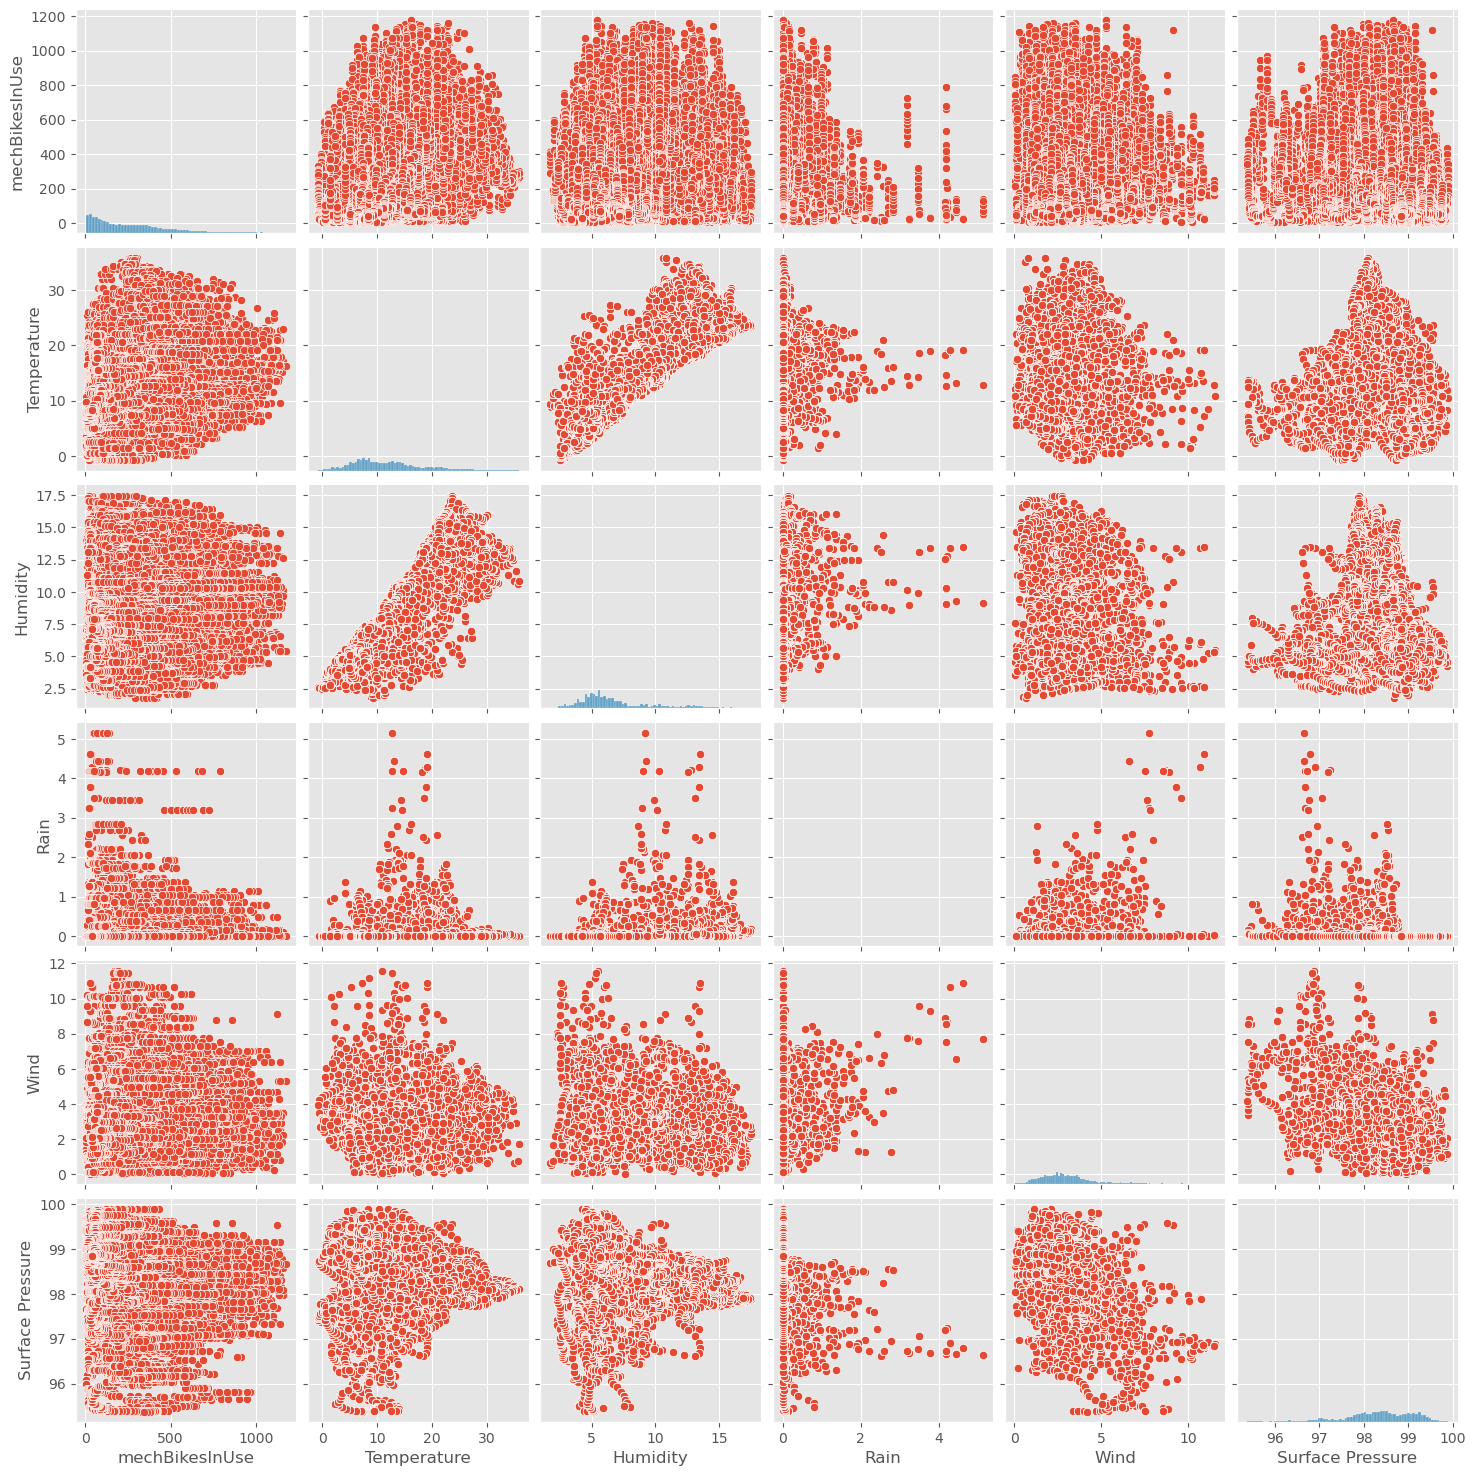

In [331]:
plt.figure(figsize=(15,15))
fig = sns.pairplot(mechanical_bikes_df)
plt.show()
fig.savefig('pairplot.png',bbox_inches='tight')

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for mechBikesInUse:
stat=0.906, p=0.000
The data from mechBikesInUse is not normally distributed
----------------------------------------------------------------------------------------------


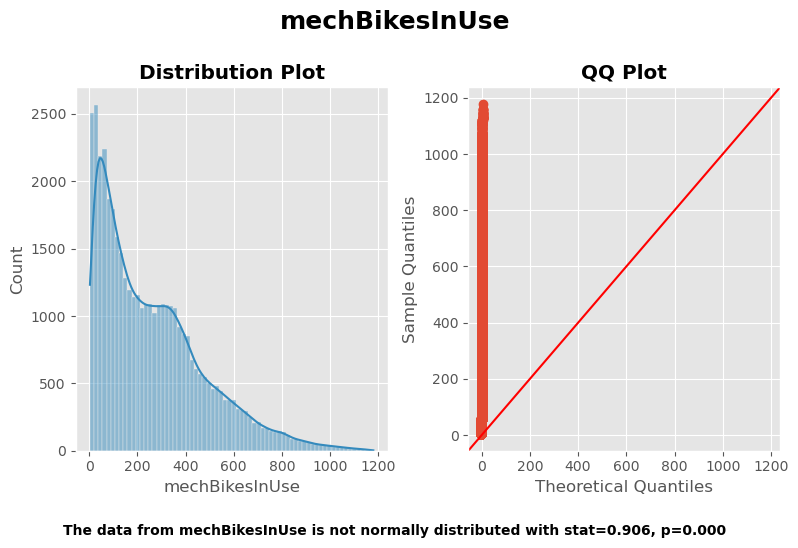

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Temperature:
stat=0.958, p=0.000
The data from Temperature is not normally distributed
----------------------------------------------------------------------------------------------


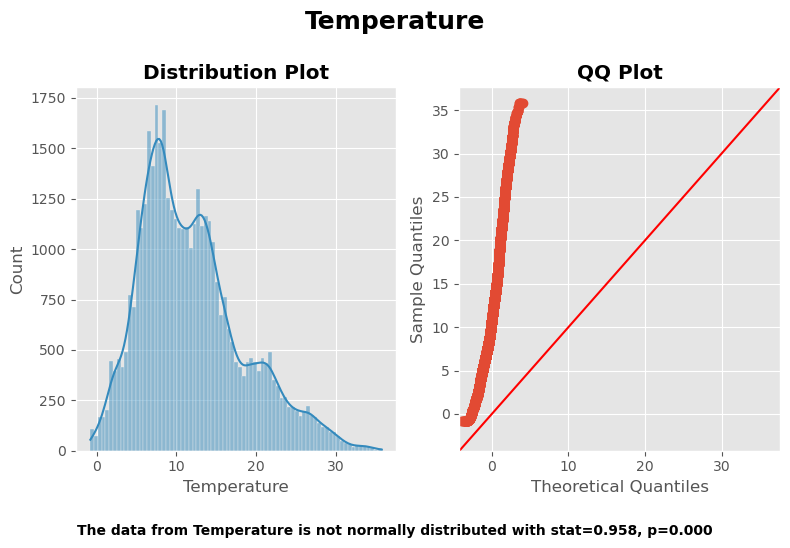

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Humidity:
stat=0.892, p=0.000
The data from Humidity is not normally distributed
----------------------------------------------------------------------------------------------


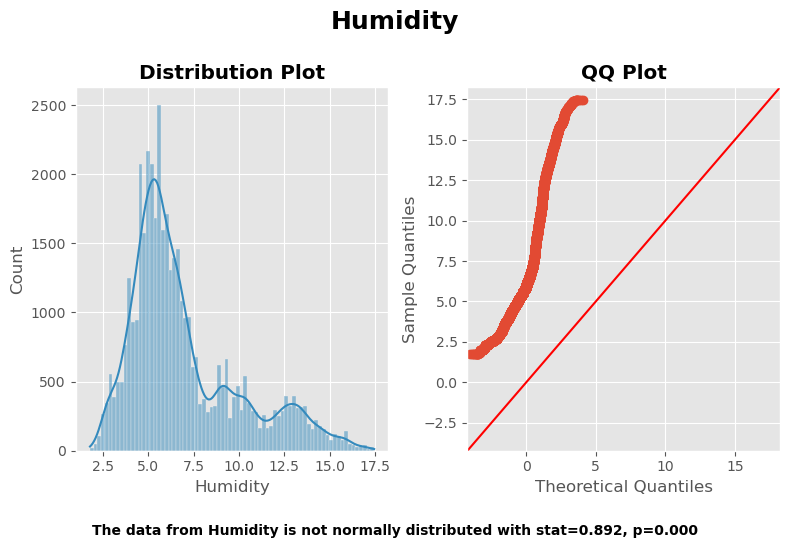

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Rain:
stat=0.253, p=0.000
The data from Rain is not normally distributed
----------------------------------------------------------------------------------------------


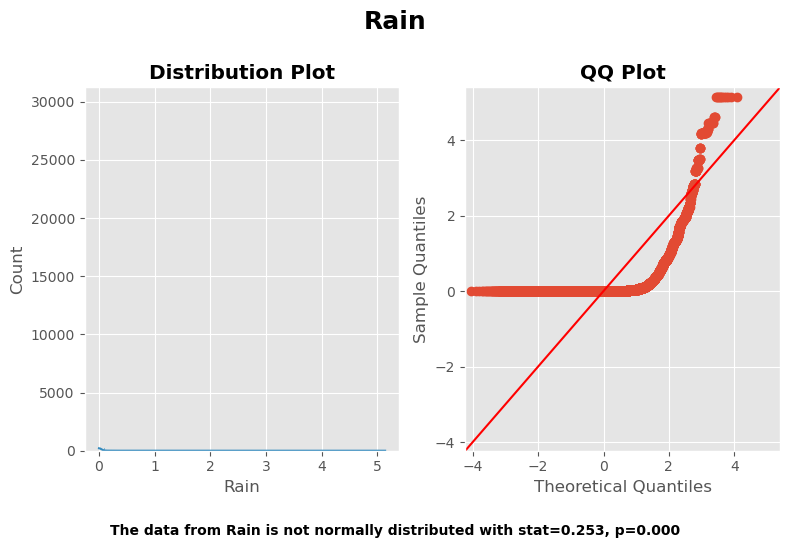

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Wind:
stat=0.916, p=0.000
The data from Wind is not normally distributed
----------------------------------------------------------------------------------------------


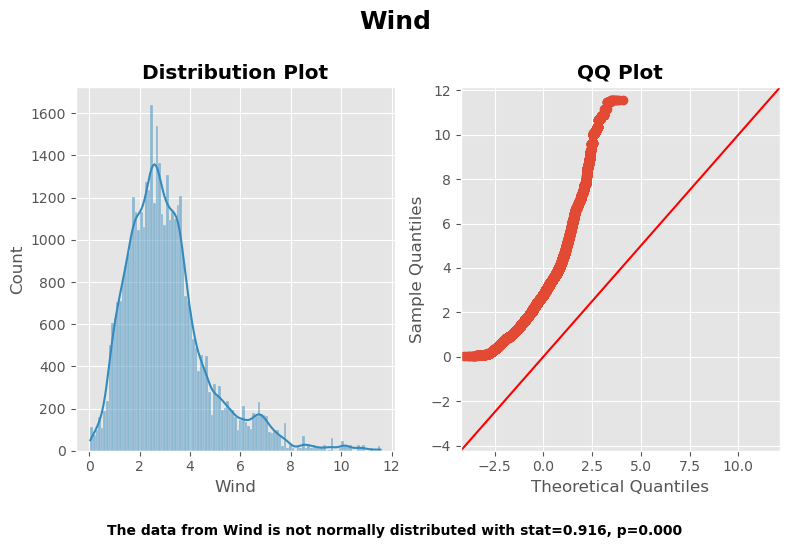

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Surface Pressure:
stat=0.954, p=0.000
The data from Surface Pressure is not normally distributed
----------------------------------------------------------------------------------------------


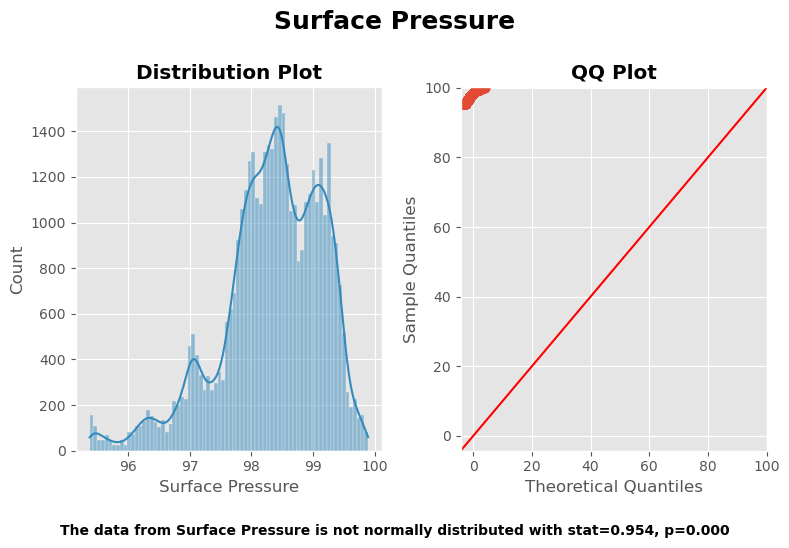

In [332]:
#use function (5) to plot and check the distribuition of each feature
check_distribution(mechanical_bikes_df)

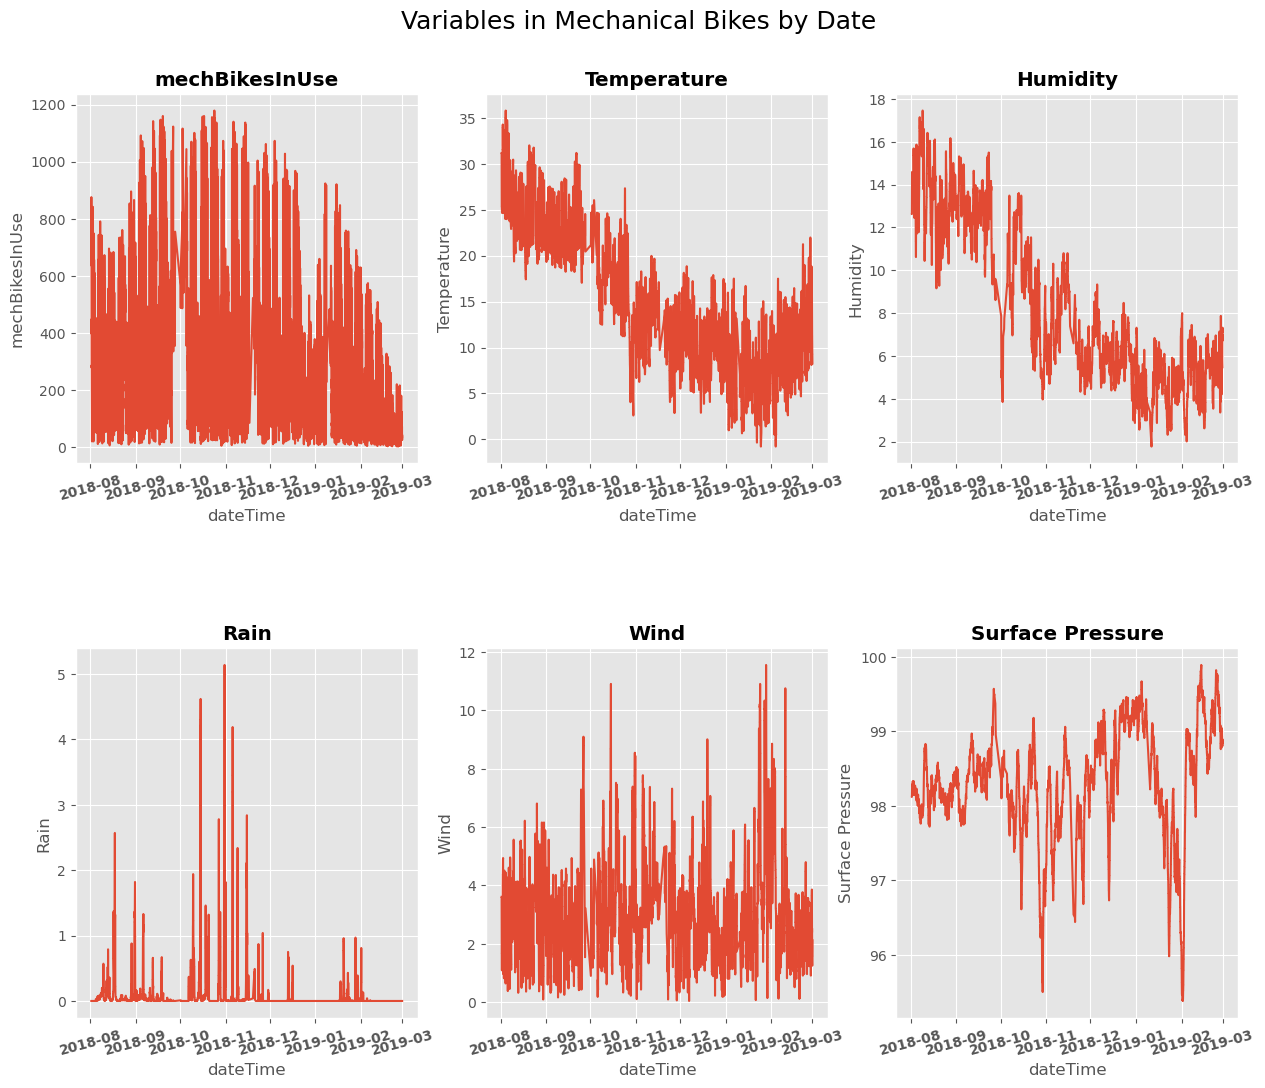

In [333]:
#use function (2) to plot the features by date
plot_cols(mechanical_bikes_df,3,"dateTime","Variables in Mechanical Bikes by Date","variables_mech_date.png")

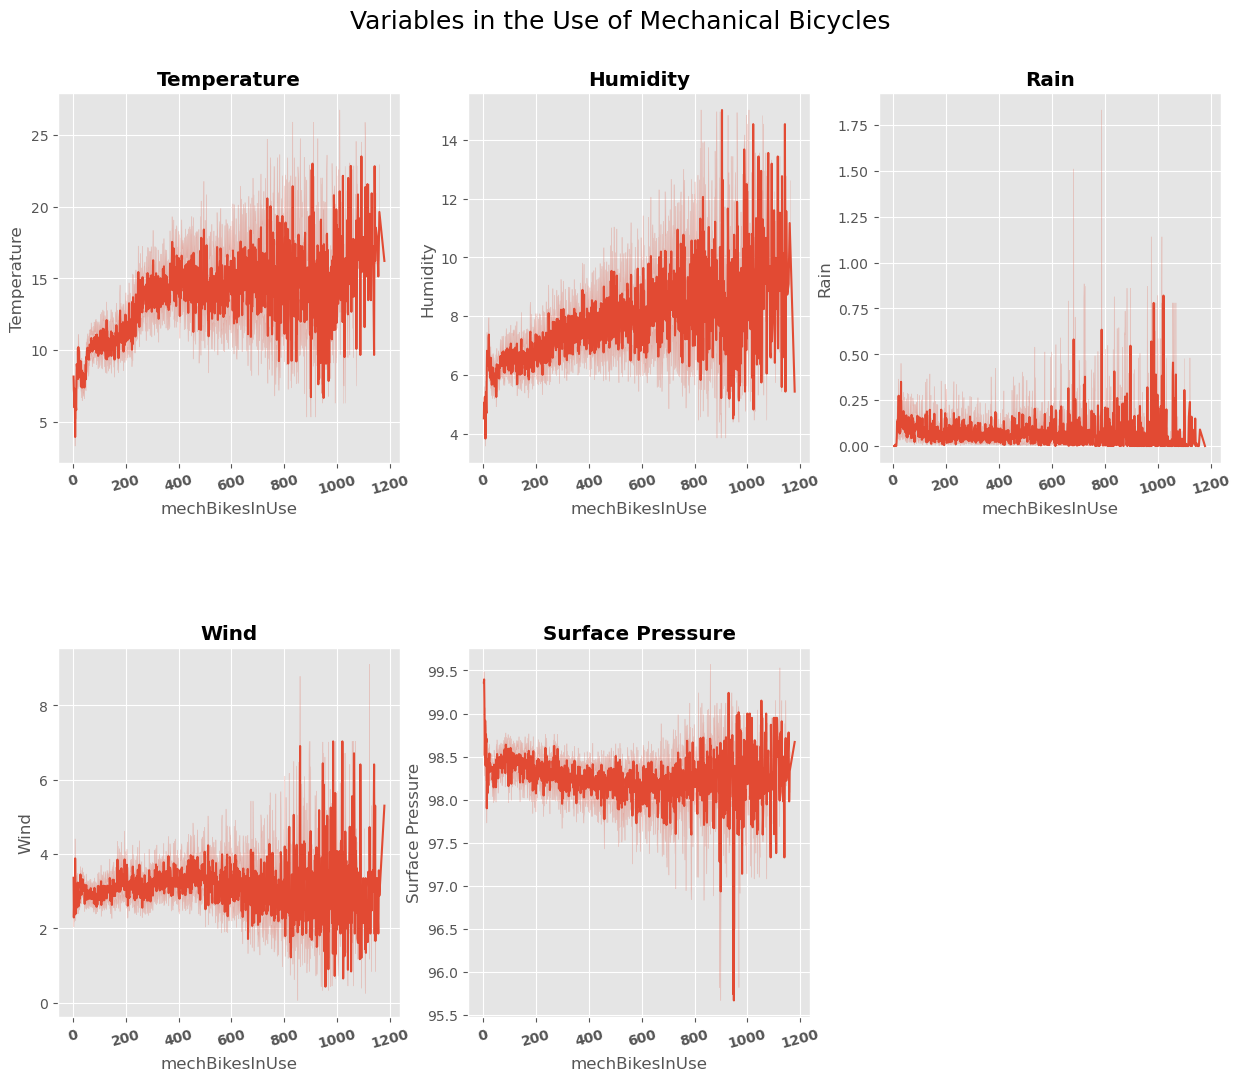

In [334]:
#use function (3) to plot the features by date
plot_variables_with_exeption(mechanical_bikes_df,3,"mechBikesInUse","dateTime","Variables in the Use of Mechanical Bicycles","variables_mech_use.png")

In [335]:
electrical_bikes_df.describe()

elecBikesInUse   Temperature      Humidity          Rain          Wind  \
count    42086.000000  42086.000000  42086.000000  42086.000000  42086.000000   
mean         3.408853     11.942065      6.970244      0.078152      3.091065   
std          3.754995      6.492491      3.078145      0.324333      1.670016   
min          0.000000     -0.780000      1.770000      0.000000      0.040000   
25%          1.000000      7.190000      4.880000      0.000000      1.950000   
50%          2.000000     10.850000      5.980000      0.000000      2.800000   
75%          5.000000     15.460000      8.480000      0.010000      3.770000   
max         39.000000     35.800000     17.460000      5.140000     11.560000   

       Surface Pressure  
count      42086.000000  
mean          98.315738  
std            0.829907  
min           95.380000  
25%           97.890000  
50%           98.400000  
75%           98.950000  
max           99.890000

In [336]:
electrical_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42086 entries, 0 to 42085
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   elecBikesInUse    42086 non-null  int64         
 1   dateTime          42086 non-null  datetime64[ns]
 2   Temperature       42086 non-null  float64       
 3   Humidity          42086 non-null  float64       
 4   Rain              42086 non-null  float64       
 5   Wind              42086 non-null  float64       
 6   Surface Pressure  42086 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.6 MB


In [337]:
no_elec_bike= electrical_bikes_df.elecBikesInUse[electrical_bikes_df.elecBikesInUse == 0].index.tolist()

In [338]:
electrical_bikes_df.iloc[no_elec_bike]

elecBikesInUse            dateTime  Temperature  Humidity  Rain  Wind  \
35                  0 2018-08-02 02:15:39        24.81     13.73   0.0  2.03   
36                  0 2018-08-02 02:30:40        24.81     13.73   0.0  2.03   
37                  0 2018-08-02 02:45:39        24.81     13.73   0.0  2.03   
38                  0 2018-08-02 03:00:42        24.98     13.43   0.0  1.92   
39                  0 2018-08-02 03:15:39        24.98     13.43   0.0  1.92   
...               ...                 ...          ...       ...   ...   ...   
41946               0 2019-02-28 12:19:57        18.69      5.62   0.0  3.64   
41947               0 2019-02-28 12:24:58        18.69      5.62   0.0  3.64   
42040               0 2019-02-28 20:09:57        10.22      6.96   0.0  1.25   
42041               0 2019-02-28 20:14:57        10.22      6.96   0.0  1.25   
42042               0 2019-02-28 20:19:58        10.22      6.96   0.0  1.25   

       Surface Pressure  
35                98.29  
36                98.29  
37                98.29  
38                98.28  
39                98.28  
...                 ...  
41946             98.98  
41947             98.98  
42040             98.89  
42041             98.89  
42042             98.89  

[8827 rows x 7 columns]

<Figure size 640x480 with 0 Axes>

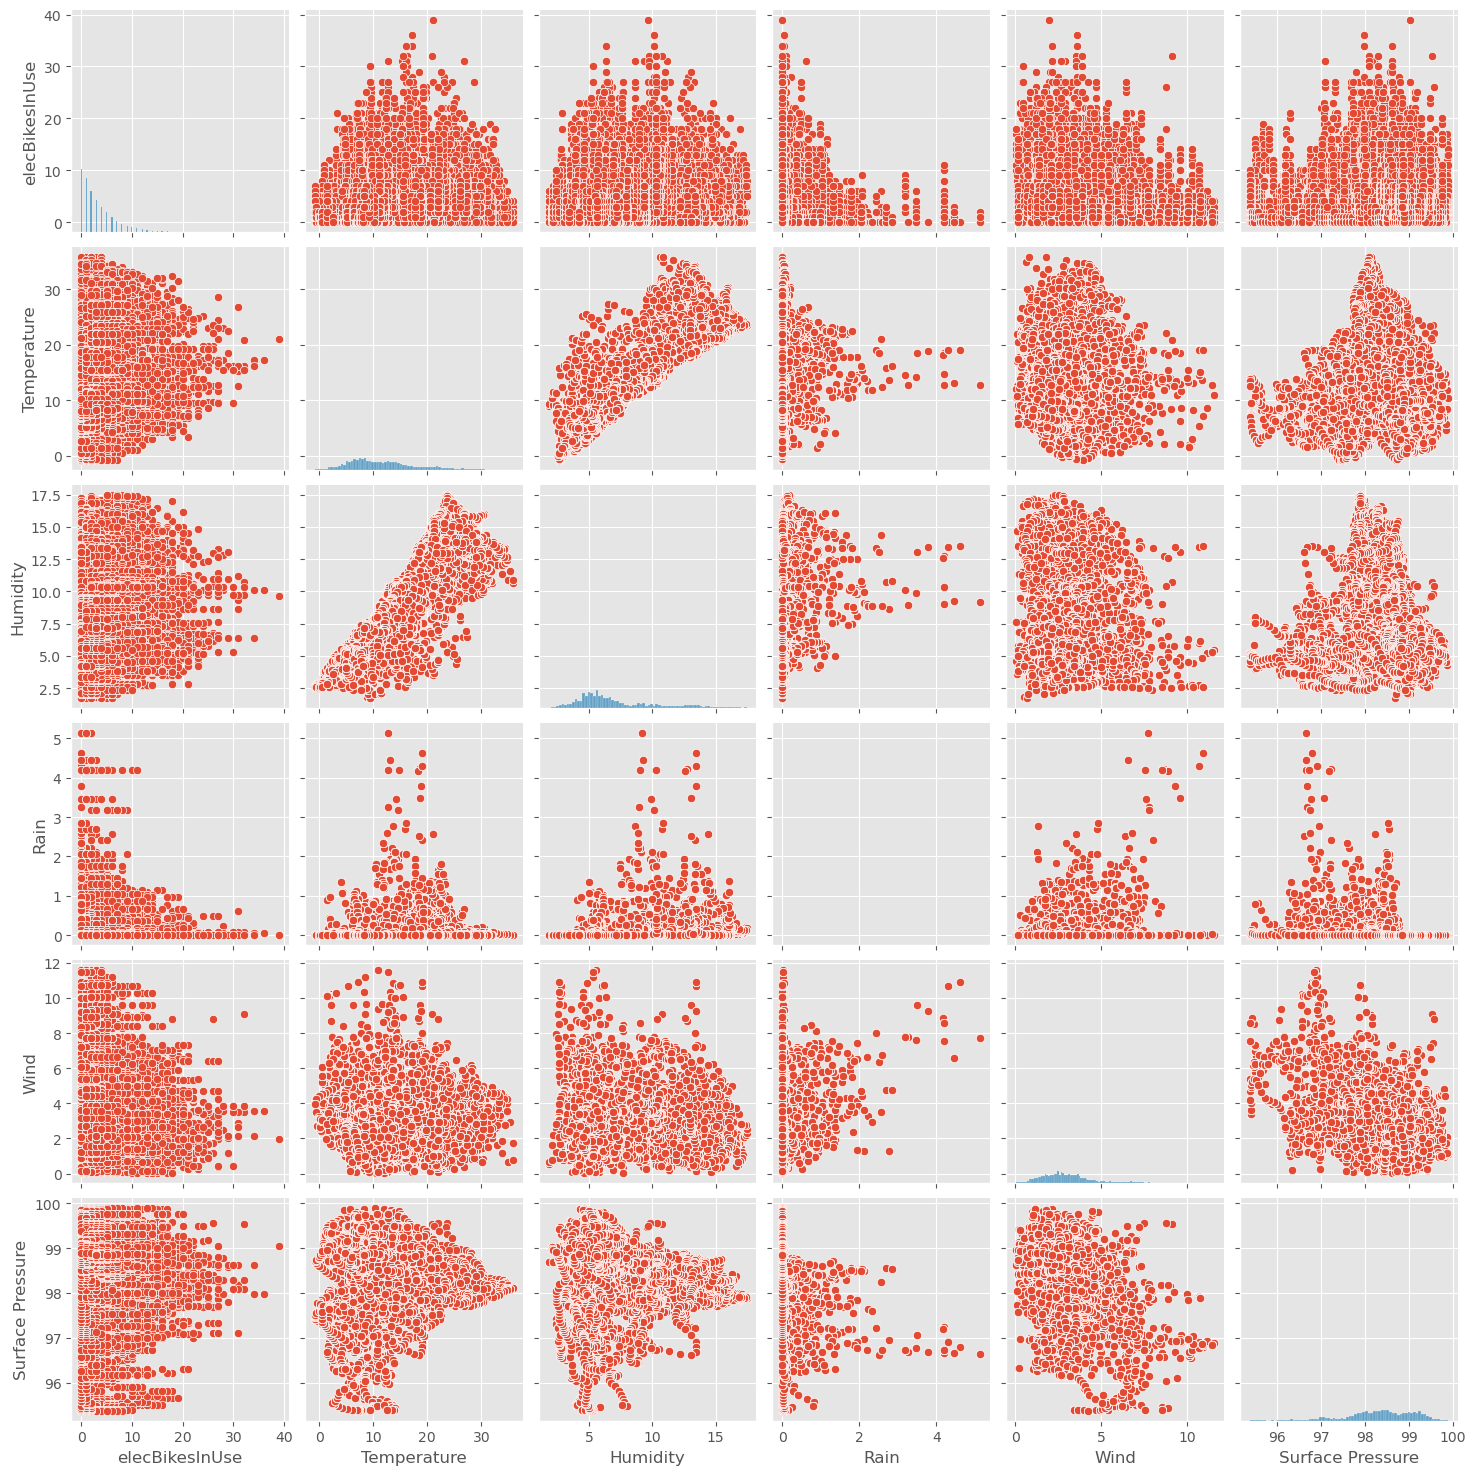

In [339]:
plt.figure()
fig = sns.pairplot(electrical_bikes_df)
plt.show()
fig.savefig("electric_pairplot.png",bbox_inches='tight')

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for elecBikesInUse:
stat=0.807, p=0.000
The data from elecBikesInUse is not normally distributed
----------------------------------------------------------------------------------------------


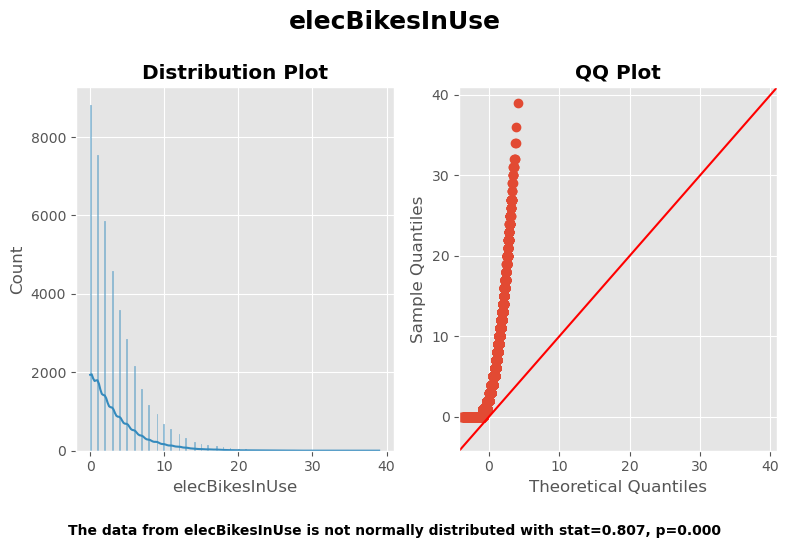

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Temperature:
stat=0.958, p=0.000
The data from Temperature is not normally distributed
----------------------------------------------------------------------------------------------


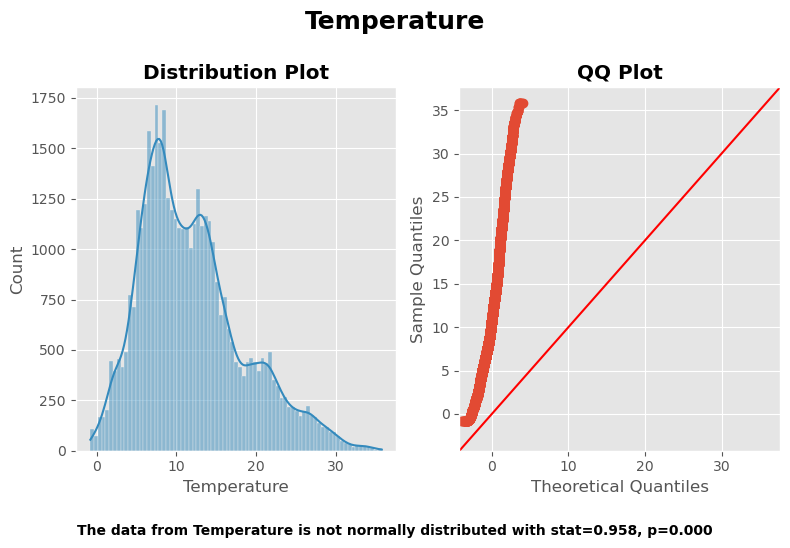

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Humidity:
stat=0.892, p=0.000
The data from Humidity is not normally distributed
----------------------------------------------------------------------------------------------


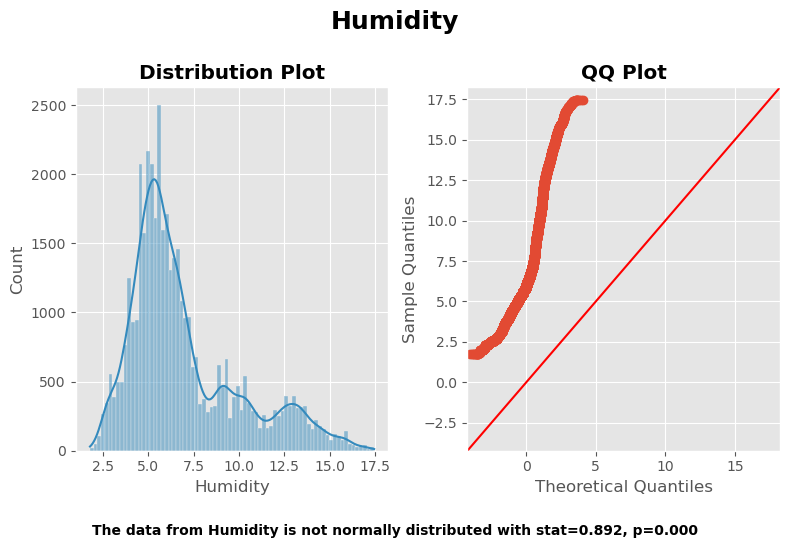

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Rain:
stat=0.253, p=0.000
The data from Rain is not normally distributed
----------------------------------------------------------------------------------------------


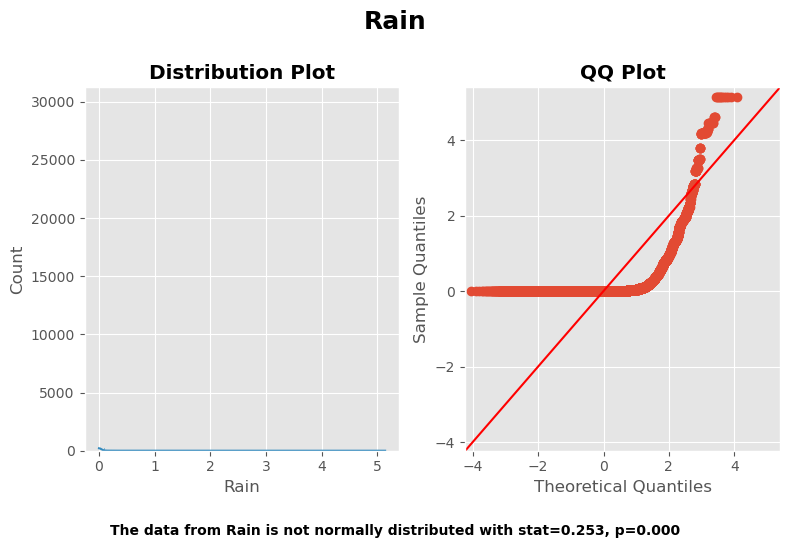

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Wind:
stat=0.916, p=0.000
The data from Wind is not normally distributed
----------------------------------------------------------------------------------------------


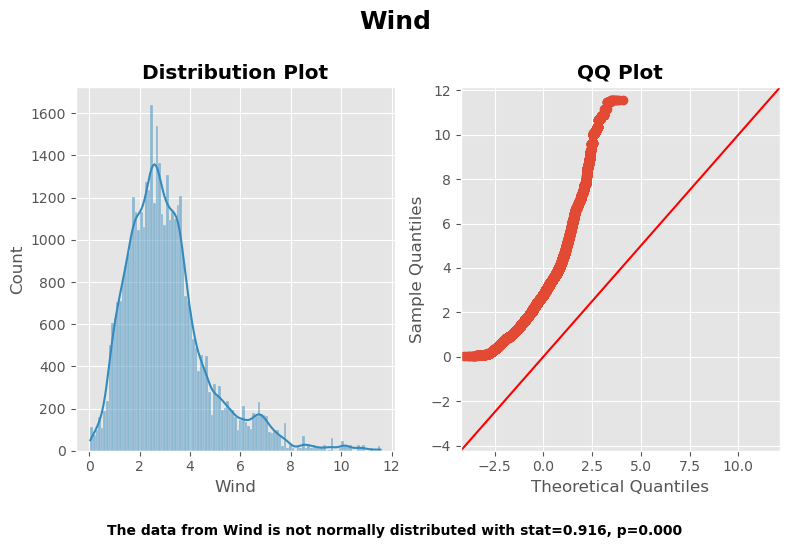

C:\Users\formacio\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Distribution for Surface Pressure:
stat=0.954, p=0.000
The data from Surface Pressure is not normally distributed
----------------------------------------------------------------------------------------------


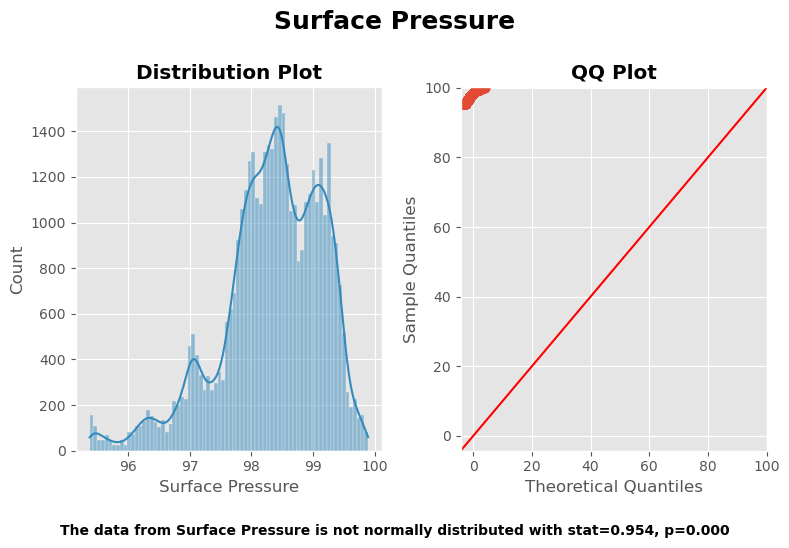

In [340]:
#use function (5) to plot and check the distribuition of each feature
check_distribution(electrical_bikes_df)

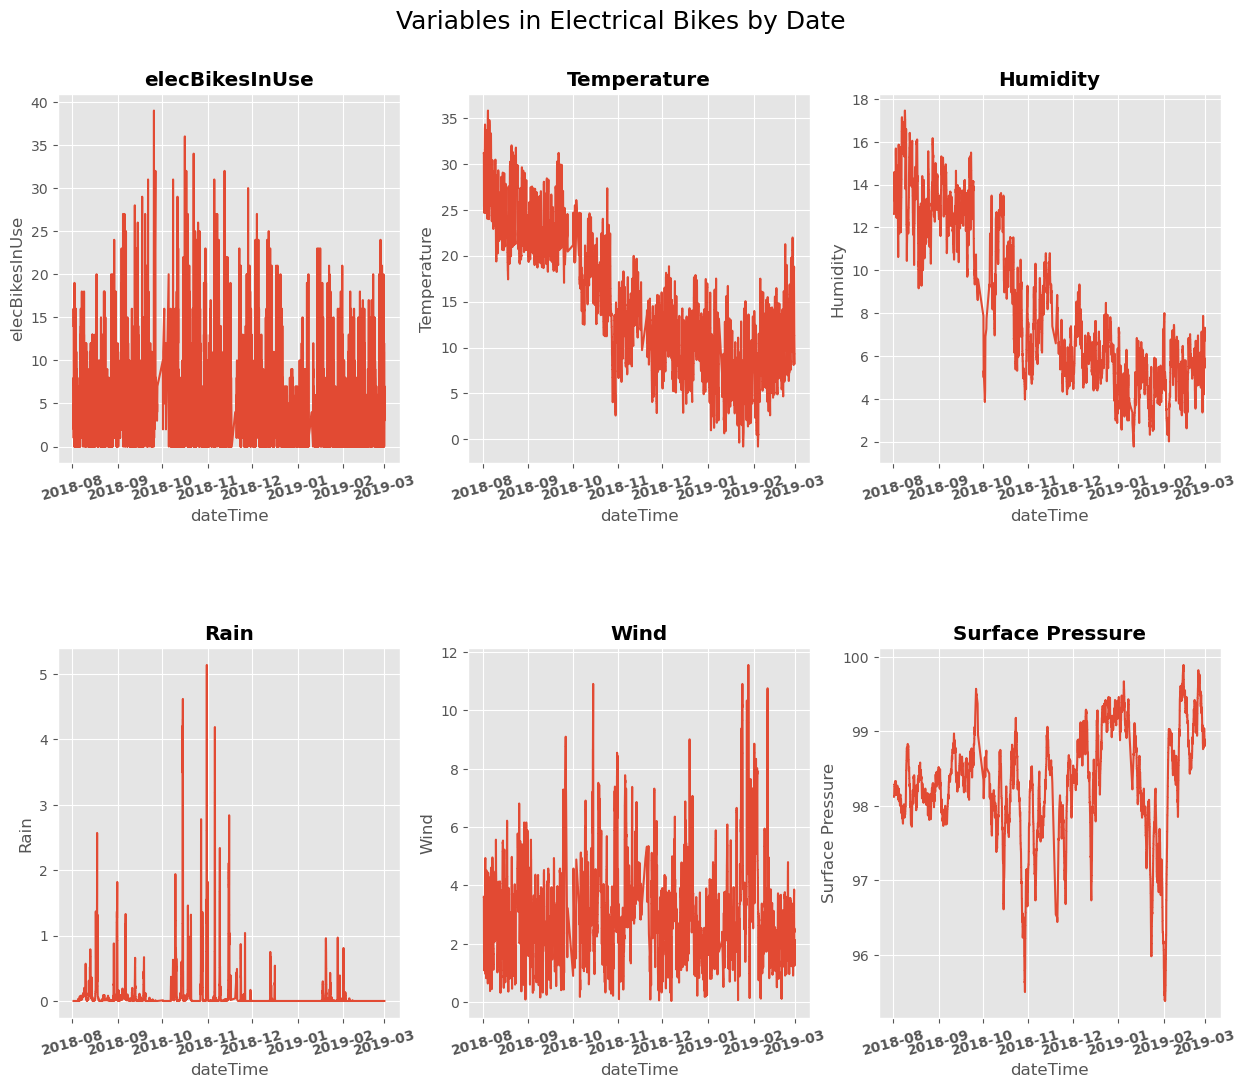

In [341]:
#use function (2) to plot the features by date
plot_cols(electrical_bikes_df,3,"dateTime","Variables in Electrical Bikes by Date","variables_elec_date.png") 

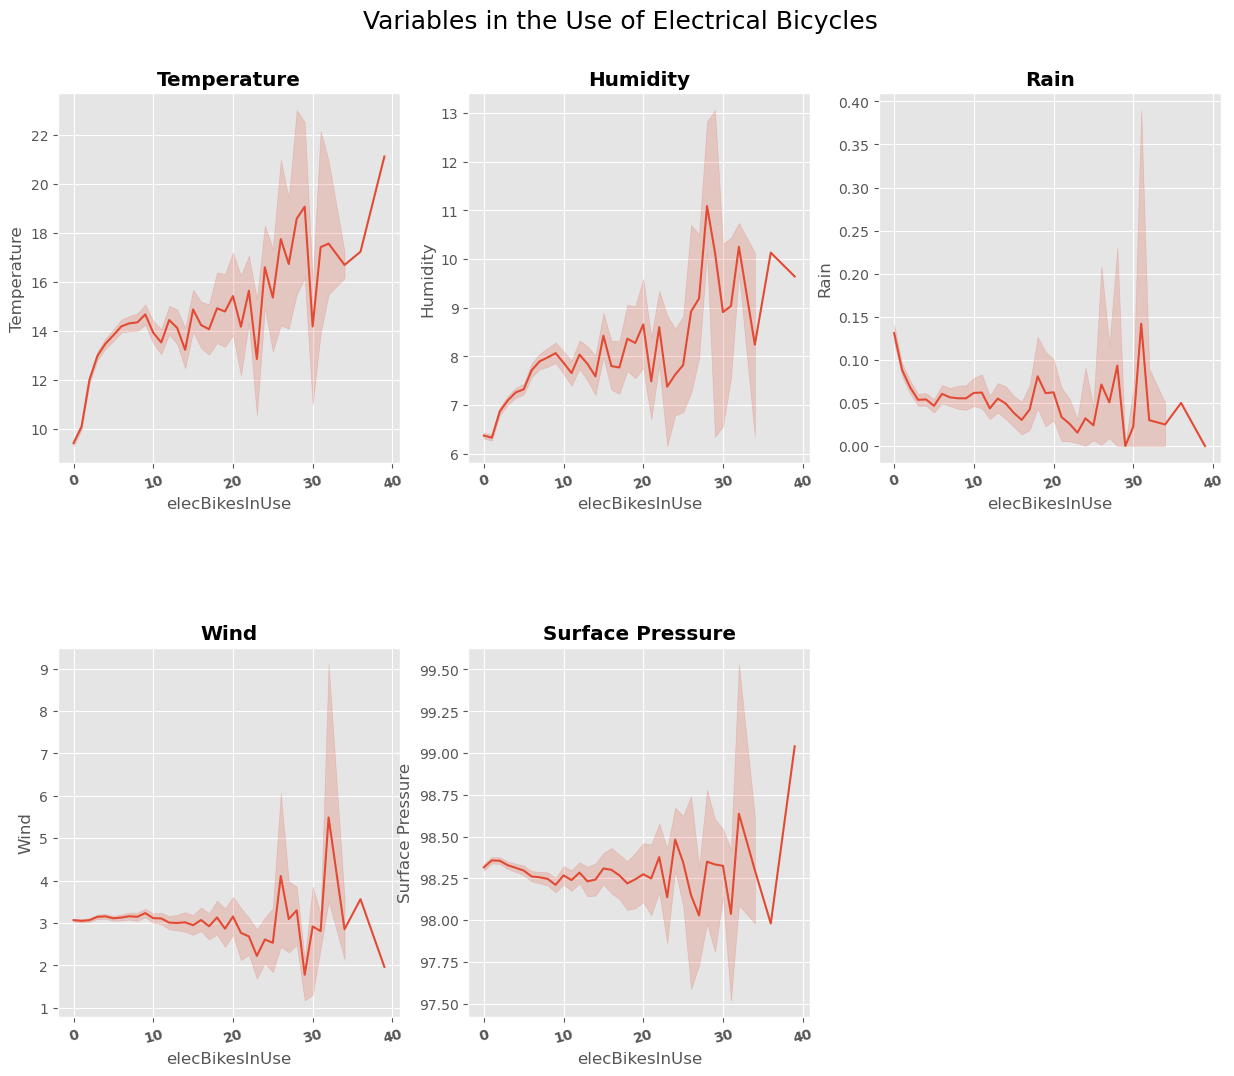

In [342]:
#use function (2) to plot the features by date
plot_variables_with_exeption(electrical_bikes_df,3,"elecBikesInUse","dateTime","Variables in the Use of Electrical Bicycles","variables_elec_use.png")

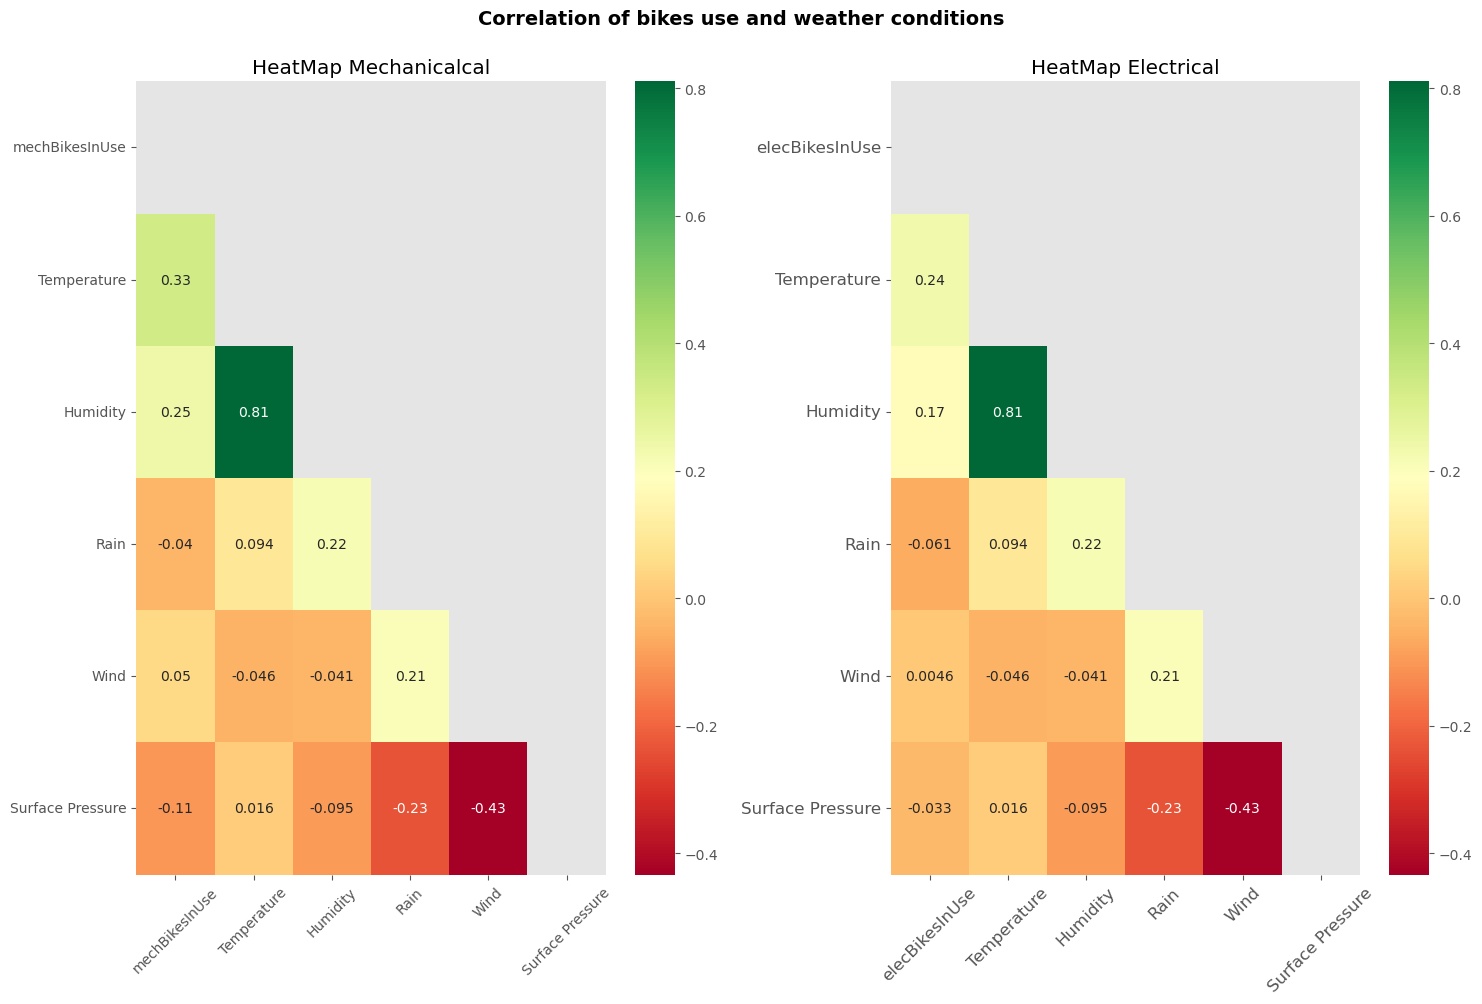

In [343]:
matrix_plot(mechanical_bikes_df,electrical_bikes_df,"Correlation of bikes use and weather conditions ","HeatMap Mechanicalcal","HeatMap Electrical","corr_bikes_use.png") 

# Pre-Processing

In [344]:
weather_selected_cols_df = weather_df[['timeStamp','T2M', 'QV2M', 'PRECTOTCORR',
       'WS10M', 'PS']]  

In [345]:
#pipe the functions (8 and 9)  to get the number of bikes in use per hour
elecBikes_hourly = data.pipe(group_by_and_sum,'timeStamp',"elecBikesInUse").pipe(merge_df,weather_selected_cols_df,'timeStamp')
elecBikes_hourly

timeStamp  elecBikesInUse    T2M   QV2M  PRECTOTCORR  WS10M  \
0    2018-08-01 17:00:00              30  31.18  12.63          0.0   3.61   
1    2018-08-01 18:00:00              49  28.69  13.61          0.0   2.96   
2    2018-08-01 19:00:00              20  26.31  14.40          0.0   2.19   
3    2018-08-01 20:00:00              28  25.35  14.59          0.0   1.67   
4    2018-08-01 21:00:00              20  25.17  14.47          0.0   1.13   
...                  ...             ...    ...    ...          ...    ...   
4645 2019-02-28 19:00:00              97  11.06   6.84          0.0   1.39   
4646 2019-02-28 20:00:00              29  10.22   6.96          0.0   1.25   
4647 2019-02-28 21:00:00              49   9.25   7.20          0.0   1.59   
4648 2019-02-28 22:00:00              50   8.63   7.32          0.0   1.91   
4649 2019-02-28 23:00:00              46   8.27   7.14          0.0   2.12   

         PS  
0     98.12  
1     98.15  
2     98.20  
3     98.25  
4     98.26  
...     ...  
4645  98.87  
4646  98.89  
4647  98.89  
4648  98.87  
4649  98.85  

[4650 rows x 7 columns]

In [346]:
#pipe the functions (8 and 9)  to get the number of bikes in use per hour
mechBikes_hourly = data.pipe(group_by_and_sum,'timeStamp',"mechBikesInUse").pipe(merge_df,weather_selected_cols_df,'timeStamp')
mechBikes_hourly

timeStamp  mechBikesInUse    T2M   QV2M  PRECTOTCORR  WS10M  \
0    2018-08-01 17:00:00            1295  31.18  12.63          0.0   3.61   
1    2018-08-01 18:00:00            3150  28.69  13.61          0.0   2.96   
2    2018-08-01 19:00:00            2999  26.31  14.40          0.0   2.19   
3    2018-08-01 20:00:00            2688  25.35  14.59          0.0   1.67   
4    2018-08-01 21:00:00            2290  25.17  14.47          0.0   1.13   
...                  ...             ...    ...    ...          ...    ...   
4645 2019-02-28 19:00:00             961  11.06   6.84          0.0   1.39   
4646 2019-02-28 20:00:00             847  10.22   6.96          0.0   1.25   
4647 2019-02-28 21:00:00             713   9.25   7.20          0.0   1.59   
4648 2019-02-28 22:00:00             470   8.63   7.32          0.0   1.91   
4649 2019-02-28 23:00:00             388   8.27   7.14          0.0   2.12   

         PS  
0     98.12  
1     98.15  
2     98.20  
3     98.25  
4     98.26  
...     ...  
4645  98.87  
4646  98.89  
4647  98.89  
4648  98.87  
4649  98.85  

[4650 rows x 7 columns]

In [347]:
#use the function (7) to get the holidays 
holiday_series = mechBikes_hourly.timeStamp.apply(cat_hol) 
holiday_series.rename("Holiday",inplace=True)

0       0
1       0
2       0
3       0
4       0
       ..
4645    0
4646    0
4647    0
4648    0
4649    0
Name: Holiday, Length: 4650, dtype: int64

In [348]:
#use the function (7) to get the business day 
bday_mech_bikes = mechBikes_hourly.timeStamp.apply(type_day)
bday_mech_bikes.rename("Business Day",inplace=True)

0       1
1       1
2       1
3       1
4       1
       ..
4645    1
4646    1
4647    1
4648    1
4649    1
Name: Business Day, Length: 4650, dtype: int64

In [349]:
#concat the data to create a DF with the holidays and business day
mechBikes_in_use_df = pd.concat([mechBikes_hourly,holiday_series,bday_mech_bikes],axis=1)
mechBikes_in_use_df 

timeStamp  mechBikesInUse    T2M   QV2M  PRECTOTCORR  WS10M  \
0    2018-08-01 17:00:00            1295  31.18  12.63          0.0   3.61   
1    2018-08-01 18:00:00            3150  28.69  13.61          0.0   2.96   
2    2018-08-01 19:00:00            2999  26.31  14.40          0.0   2.19   
3    2018-08-01 20:00:00            2688  25.35  14.59          0.0   1.67   
4    2018-08-01 21:00:00            2290  25.17  14.47          0.0   1.13   
...                  ...             ...    ...    ...          ...    ...   
4645 2019-02-28 19:00:00             961  11.06   6.84          0.0   1.39   
4646 2019-02-28 20:00:00             847  10.22   6.96          0.0   1.25   
4647 2019-02-28 21:00:00             713   9.25   7.20          0.0   1.59   
4648 2019-02-28 22:00:00             470   8.63   7.32          0.0   1.91   
4649 2019-02-28 23:00:00             388   8.27   7.14          0.0   2.12   

         PS  Holiday  Business Day  
0     98.12        0             1  
1     98.15        0             1  
2     98.20        0             1  
3     98.25        0             1  
4     98.26        0             1  
...     ...      ...           ...  
4645  98.87        0             1  
4646  98.89        0             1  
4647  98.89        0             1  
4648  98.87        0             1  
4649  98.85        0             1  

[4650 rows x 9 columns]

In [350]:
mechanical_bikes_df.columns

Index(['mechBikesInUse', 'dateTime', 'Temperature', 'Humidity', 'Rain', 'Wind',
       'Surface Pressure'],
      dtype='object')

In [351]:
#cyclical encoding of time
#mechBikes_in_use_df["Time_sin"] = time_cyclical_encoding(mechBikes_in_use_df ,"timeStamp","sin")
#mechBikes_in_use_df["Time_cos"] = time_cyclical_encoding(mechBikes_in_use_df ,"timeStamp","cos")
mechBikes_in_use_df.rename(columns={"timeStamp":"Date"},inplace=True)       
mechBikes_in_use_df.head()

Date  mechBikesInUse    T2M   QV2M  PRECTOTCORR  WS10M  \
0 2018-08-01 17:00:00            1295  31.18  12.63          0.0   3.61   
1 2018-08-01 18:00:00            3150  28.69  13.61          0.0   2.96   
2 2018-08-01 19:00:00            2999  26.31  14.40          0.0   2.19   
3 2018-08-01 20:00:00            2688  25.35  14.59          0.0   1.67   
4 2018-08-01 21:00:00            2290  25.17  14.47          0.0   1.13   

      PS  Holiday  Business Day  
0  98.12        0             1  
1  98.15        0             1  
2  98.20        0             1  
3  98.25        0             1  
4  98.26        0             1

In [352]:
#select and order the columns 
data_mechBikes_in_use_df = mechBikes_in_use_df[['Date', 'mechBikesInUse', 'T2M', 'QV2M',
                                                'PRECTOTCORR', 'WS10M',
                                                'PS', 'Holiday', 'Business Day']]

In [353]:
data_mechBikes_in_use_df.rename(columns={
                     "T2M":"Temperature","QV2M":"Humidity","PRECTOTCORR":"Rain",
                     "WS10M":"Wind","PS":"Surface Pressure"},inplace=True) 

In [354]:
data_mechBikes_in_use_df.head()

Date  mechBikesInUse  Temperature  Humidity  Rain  Wind  \
0 2018-08-01 17:00:00            1295        31.18     12.63   0.0  3.61   
1 2018-08-01 18:00:00            3150        28.69     13.61   0.0  2.96   
2 2018-08-01 19:00:00            2999        26.31     14.40   0.0  2.19   
3 2018-08-01 20:00:00            2688        25.35     14.59   0.0  1.67   
4 2018-08-01 21:00:00            2290        25.17     14.47   0.0  1.13   

   Surface Pressure  Holiday  Business Day  
0             98.12        0             1  
1             98.15        0             1  
2             98.20        0             1  
3             98.25        0             1  
4             98.26        0             1

In [355]:
#get the index of the rows with mechanical use of bikes as zero
no_mech_bikes = loop_for_zeros(data_mechBikes_in_use_df,"mechBikesInUse")

In [356]:
len(no_mech_bikes)

0

In [357]:
data_mechBikes_in_use_df.iloc[no_mech_bikes]

Empty DataFrame
Columns: [Date, mechBikesInUse, Temperature, Humidity, Rain, Wind, Surface Pressure, Holiday, Business Day]
Index: []

In [358]:
#function (11) to drop the zero values from DF 
drop_zero_values(data_mechBikes_in_use_df,no_mech_bikes)

In [359]:
data_mechBikes_in_use_df.head()

Date  mechBikesInUse  Temperature  Humidity  Rain  Wind  \
0 2018-08-01 17:00:00            1295        31.18     12.63   0.0  3.61   
1 2018-08-01 18:00:00            3150        28.69     13.61   0.0  2.96   
2 2018-08-01 19:00:00            2999        26.31     14.40   0.0  2.19   
3 2018-08-01 20:00:00            2688        25.35     14.59   0.0  1.67   
4 2018-08-01 21:00:00            2290        25.17     14.47   0.0  1.13   

   Surface Pressure  Holiday  Business Day  
0             98.12        0             1  
1             98.15        0             1  
2             98.20        0             1  
3             98.25        0             1  
4             98.26        0             1

In [360]:
data_mechBikes_in_use_df.describe()

mechBikesInUse  Temperature     Humidity         Rain         Wind  \
count     4650.000000  4650.000000  4650.000000  4650.000000  4650.000000   
mean      2362.645376    14.453544     8.279974     0.087852     3.028783   
std       2190.271285     7.609092     3.741694     0.331995     1.624337   
min         30.000000    -0.780000     1.770000     0.000000     0.040000   
25%        784.000000     8.120000     5.250000     0.000000     1.900000   
50%       1613.000000    13.330000     6.900000     0.000000     2.750000   
75%       3345.000000    20.620000    11.900000     0.030000     3.750000   
max      12698.000000    35.800000    17.460000     5.140000    11.560000   

       Surface Pressure      Holiday  Business Day  
count       4650.000000  4650.000000   4650.000000  
mean          98.297004     0.051613      0.710753  
std            0.750441     0.221268      0.453462  
min           95.380000     0.000000      0.000000  
25%           97.930000     0.000000      0.000000  
50%           98.330000     0.000000      1.000000  
75%           98.810000     0.000000      1.000000  
max           99.890000     1.000000      1.000000

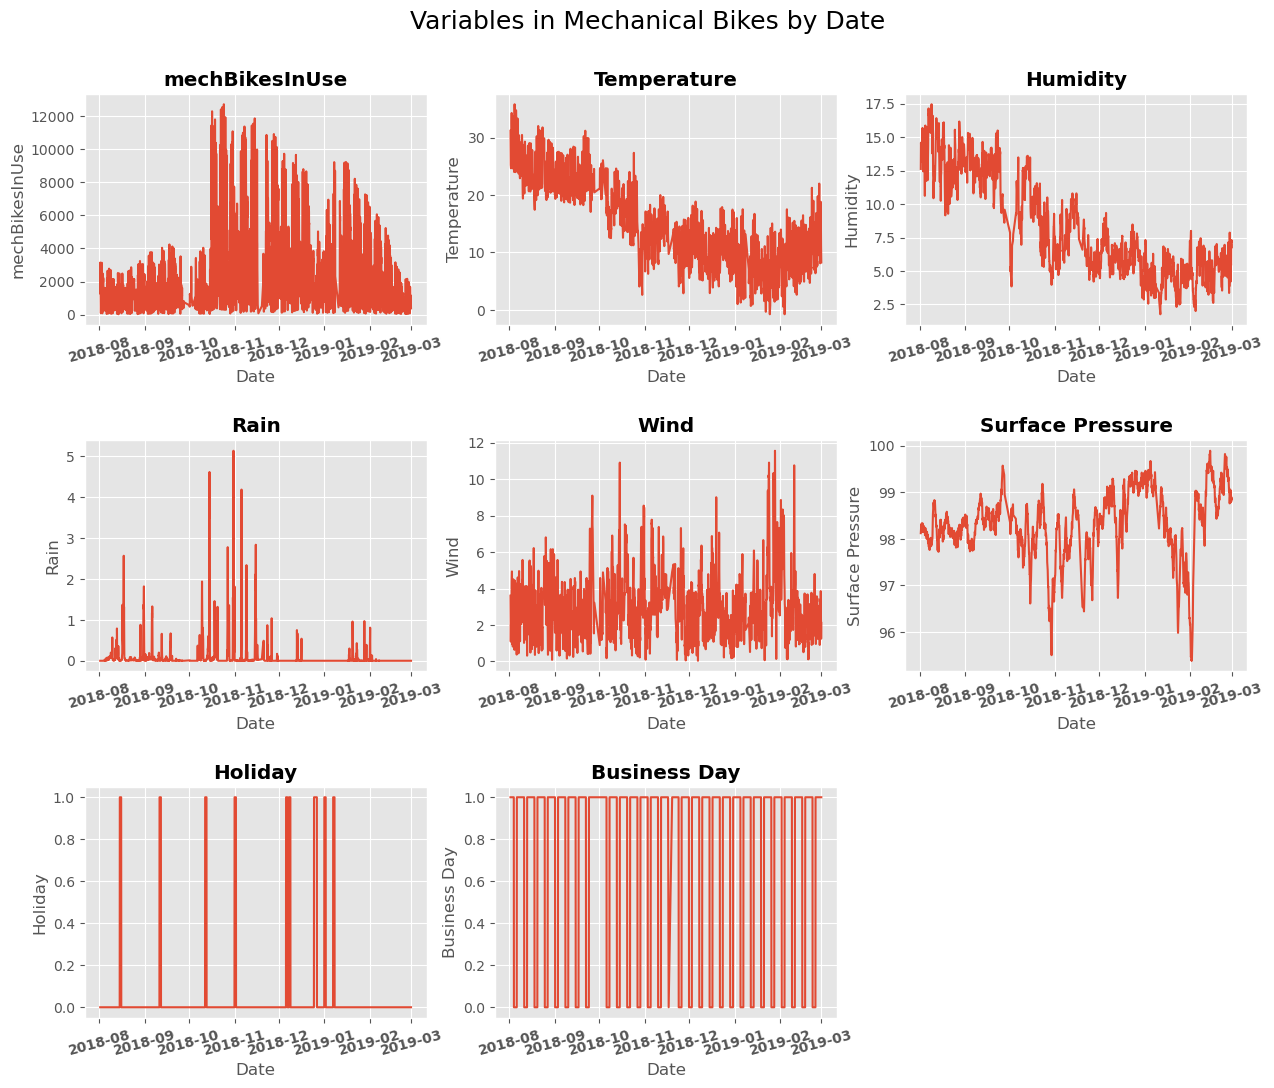

In [361]:
#use function (2) to plot the features by date
plot_cols(data_mechBikes_in_use_df,3,"Date","Variables in Mechanical Bikes by Date","prepro_var_dates_mechbikes.png")

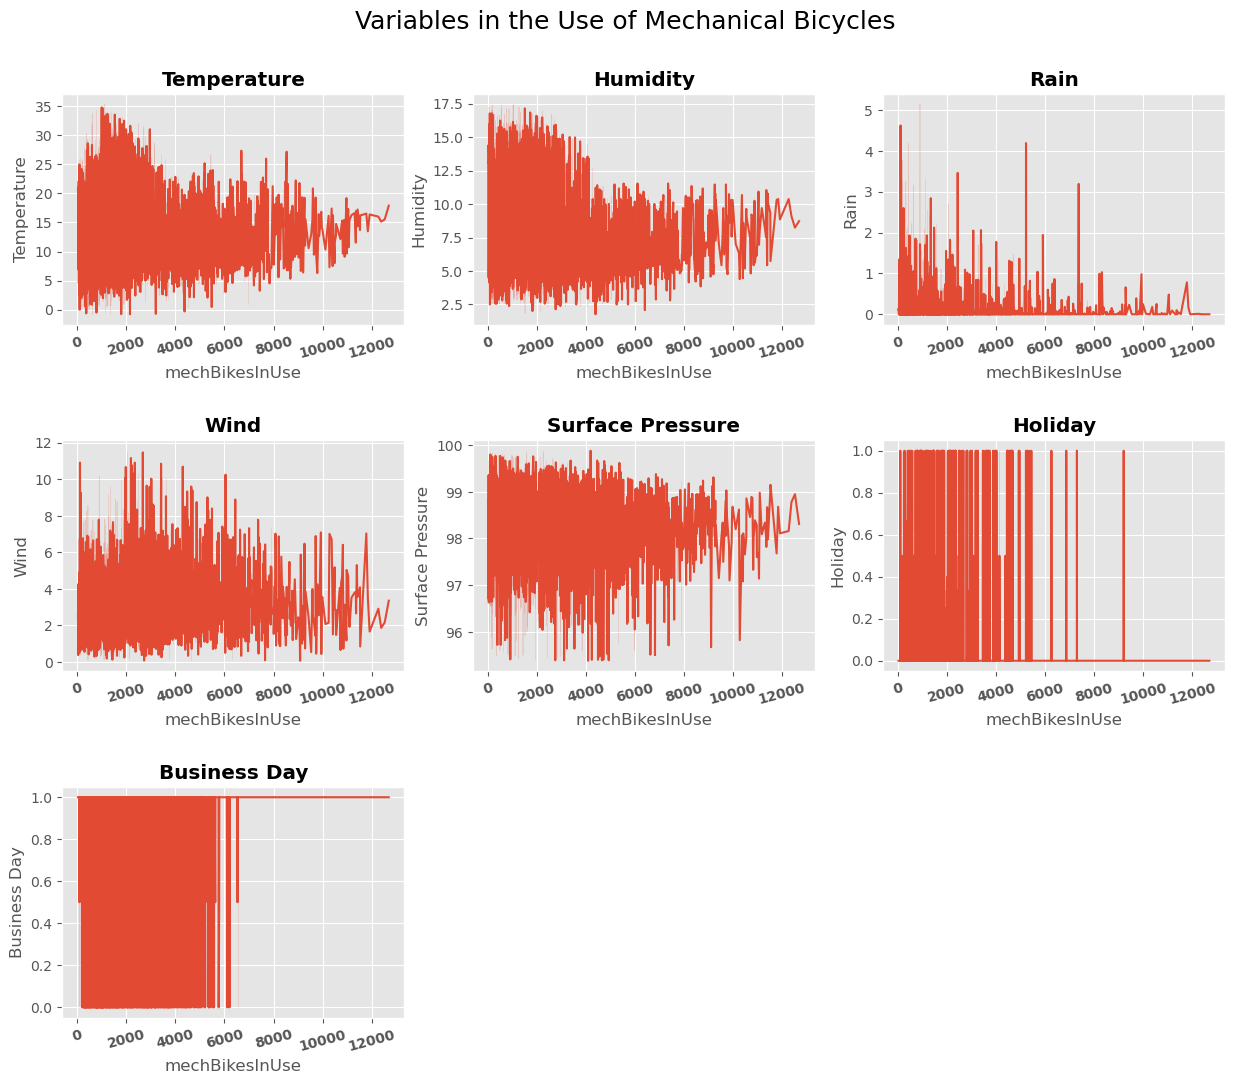

In [362]:
#use function (3) to plot the features by date
plot_variables_with_exeption(data_mechBikes_in_use_df,3,"mechBikesInUse","Date","Variables in the Use of Mechanical Bicycles","prepro_var_use_mechbikes.png") 

In [363]:
#concat the data to create a DF with the holidays and business day
elecBikes_in_use_df = pd.concat([elecBikes_hourly,holiday_series,bday_mech_bikes],axis=1)
elecBikes_in_use_df 

timeStamp  elecBikesInUse    T2M   QV2M  PRECTOTCORR  WS10M  \
0    2018-08-01 17:00:00              30  31.18  12.63          0.0   3.61   
1    2018-08-01 18:00:00              49  28.69  13.61          0.0   2.96   
2    2018-08-01 19:00:00              20  26.31  14.40          0.0   2.19   
3    2018-08-01 20:00:00              28  25.35  14.59          0.0   1.67   
4    2018-08-01 21:00:00              20  25.17  14.47          0.0   1.13   
...                  ...             ...    ...    ...          ...    ...   
4645 2019-02-28 19:00:00              97  11.06   6.84          0.0   1.39   
4646 2019-02-28 20:00:00              29  10.22   6.96          0.0   1.25   
4647 2019-02-28 21:00:00              49   9.25   7.20          0.0   1.59   
4648 2019-02-28 22:00:00              50   8.63   7.32          0.0   1.91   
4649 2019-02-28 23:00:00              46   8.27   7.14          0.0   2.12   

         PS  Holiday  Business Day  
0     98.12        0             1  
1     98.15        0             1  
2     98.20        0             1  
3     98.25        0             1  
4     98.26        0             1  
...     ...      ...           ...  
4645  98.87        0             1  
4646  98.89        0             1  
4647  98.89        0             1  
4648  98.87        0             1  
4649  98.85        0             1  

[4650 rows x 9 columns]

In [364]:
#cyclical encoding of time
#elecBikes_in_use_df["Time_sin"] = time_cyclical_encoding(elecBikes_in_use_df ,"timeStamp","sin")
#elecBikes_in_use_df["Time_cos"] = time_cyclical_encoding(elecBikes_in_use_df ,"timeStamp","cos")
elecBikes_in_use_df.rename(columns={"timeStamp":"Date"},inplace=True)
elecBikes_in_use_df

Date  elecBikesInUse    T2M   QV2M  PRECTOTCORR  WS10M  \
0    2018-08-01 17:00:00              30  31.18  12.63          0.0   3.61   
1    2018-08-01 18:00:00              49  28.69  13.61          0.0   2.96   
2    2018-08-01 19:00:00              20  26.31  14.40          0.0   2.19   
3    2018-08-01 20:00:00              28  25.35  14.59          0.0   1.67   
4    2018-08-01 21:00:00              20  25.17  14.47          0.0   1.13   
...                  ...             ...    ...    ...          ...    ...   
4645 2019-02-28 19:00:00              97  11.06   6.84          0.0   1.39   
4646 2019-02-28 20:00:00              29  10.22   6.96          0.0   1.25   
4647 2019-02-28 21:00:00              49   9.25   7.20          0.0   1.59   
4648 2019-02-28 22:00:00              50   8.63   7.32          0.0   1.91   
4649 2019-02-28 23:00:00              46   8.27   7.14          0.0   2.12   

         PS  Holiday  Business Day  
0     98.12        0             1  
1     98.15        0             1  
2     98.20        0             1  
3     98.25        0             1  
4     98.26        0             1  
...     ...      ...           ...  
4645  98.87        0             1  
4646  98.89        0             1  
4647  98.89        0             1  
4648  98.87        0             1  
4649  98.85        0             1  

[4650 rows x 9 columns]

In [365]:
#select and order the columns 
data_elecBikes_in_use_df = elecBikes_in_use_df[['Date', 'elecBikesInUse', 'T2M', 'QV2M',
                                                'PRECTOTCORR', 'WS10M',
                                                'PS', 'Holiday', 'Business Day']]

In [366]:
data_elecBikes_in_use_df.rename(columns={
                     "T2M":"Temperature","QV2M":"Humidity","PRECTOTCORR":"Rain",
                     "WS10M":"Wind","PS":"Surface Pressure"},inplace=True) 

In [367]:
data_elecBikes_in_use_df.head()

Date  elecBikesInUse  Temperature  Humidity  Rain  Wind  \
0 2018-08-01 17:00:00              30        31.18     12.63   0.0  3.61   
1 2018-08-01 18:00:00              49        28.69     13.61   0.0  2.96   
2 2018-08-01 19:00:00              20        26.31     14.40   0.0  2.19   
3 2018-08-01 20:00:00              28        25.35     14.59   0.0  1.67   
4 2018-08-01 21:00:00              20        25.17     14.47   0.0  1.13   

   Surface Pressure  Holiday  Business Day  
0             98.12        0             1  
1             98.15        0             1  
2             98.20        0             1  
3             98.25        0             1  
4             98.26        0             1

In [368]:
#get the index of the rows with mechanical use of bikes as zero
no_elec_bikes = loop_for_zeros(data_elecBikes_in_use_df,"elecBikesInUse")

In [369]:
len(no_elec_bikes)

382

In [370]:
data_elecBikes_in_use_df.iloc[no_elec_bikes]

Date  elecBikesInUse  Temperature  Humidity  Rain  Wind  \
10   2018-08-02 03:00:00               0        24.98     13.43   0.0  1.92   
11   2018-08-02 04:00:00               0        24.98     13.24   0.0  1.83   
12   2018-08-02 05:00:00               0        25.76     14.40   0.0  1.57   
34   2018-08-03 03:00:00               0        24.69     13.92   0.0  2.00   
35   2018-08-03 04:00:00               0        24.64     13.55   0.0  1.93   
...                  ...             ...          ...       ...   ...   ...   
4606 2019-02-27 04:00:00               0         9.51      3.91   0.0  2.79   
4607 2019-02-27 05:00:00               0         9.56      3.60   0.0  2.70   
4629 2019-02-28 03:00:00               0        10.63      4.76   0.0  1.87   
4630 2019-02-28 04:00:00               0         9.81      4.46   0.0  2.09   
4631 2019-02-28 05:00:00               0         8.48      4.27   0.0  2.73   

      Surface Pressure  Holiday  Business Day  
10               98.28        0             1  
11               98.29        0             1  
12               98.31        0             1  
34               98.15        0             1  
35               98.16        0             1  
...                ...      ...           ...  
4606             99.00        0             1  
4607             99.00        0             1  
4629             98.78        0             1  
4630             98.79        0             1  
4631             98.83        0             1  

[382 rows x 9 columns]

In [371]:
#function (11) to drop the zero values from DF 
drop_zero_values(data_elecBikes_in_use_df,no_elec_bikes)

In [372]:
data_elecBikes_in_use_df.describe()

elecBikesInUse  Temperature     Humidity         Rain         Wind  \
count     4268.000000  4268.000000  4268.000000  4268.000000  4268.000000   
mean        33.614105    14.754487     8.336525     0.080066     3.041781   
std         34.437131     7.618251     3.743576     0.298745     1.627639   
min          1.000000    -0.780000     1.770000     0.000000     0.040000   
25%         11.000000     8.340000     5.250000     0.000000     1.920000   
50%         22.000000    13.655000     6.960000     0.000000     2.760000   
75%         43.000000    20.872500    11.960000     0.030000     3.770000   
max        251.000000    35.800000    17.460000     5.140000    11.560000   

       Surface Pressure      Holiday  Business Day  
count       4268.000000  4268.000000   4268.000000  
mean          98.300532     0.050843      0.700562  
std            0.741114     0.219704      0.458065  
min           95.380000     0.000000      0.000000  
25%           97.940000     0.000000      0.000000  
50%           98.340000     0.000000      1.000000  
75%           98.800000     0.000000      1.000000  
max           99.890000     1.000000      1.000000

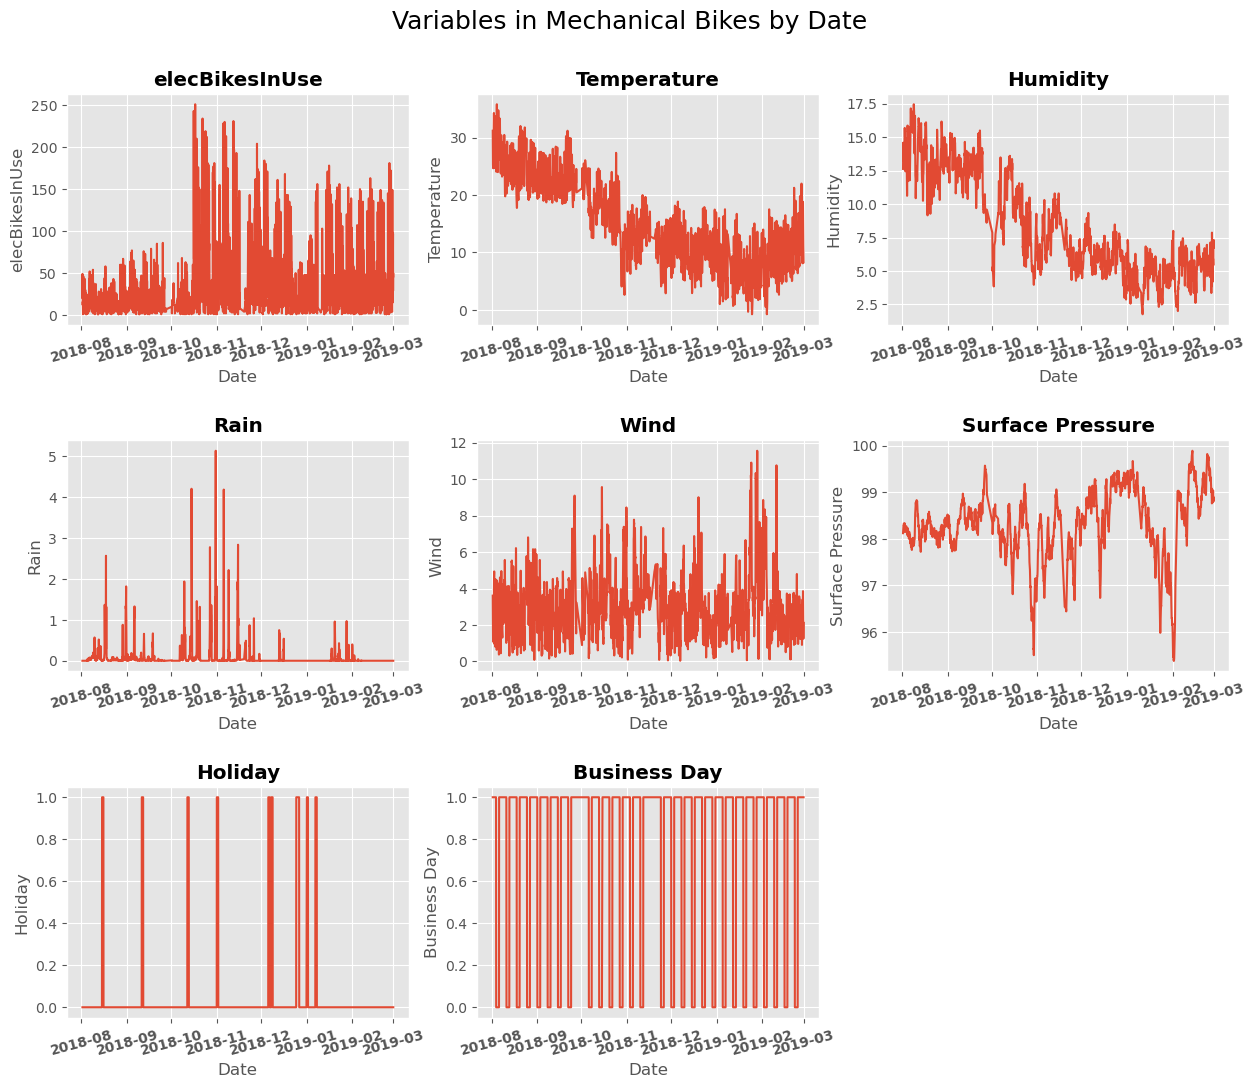

In [373]:
#use function (2) to plot the features by date
plot_cols(data_elecBikes_in_use_df,3,"Date","Variables in Mechanical Bikes by Date","prepro_var_dates_elecbikes.png")

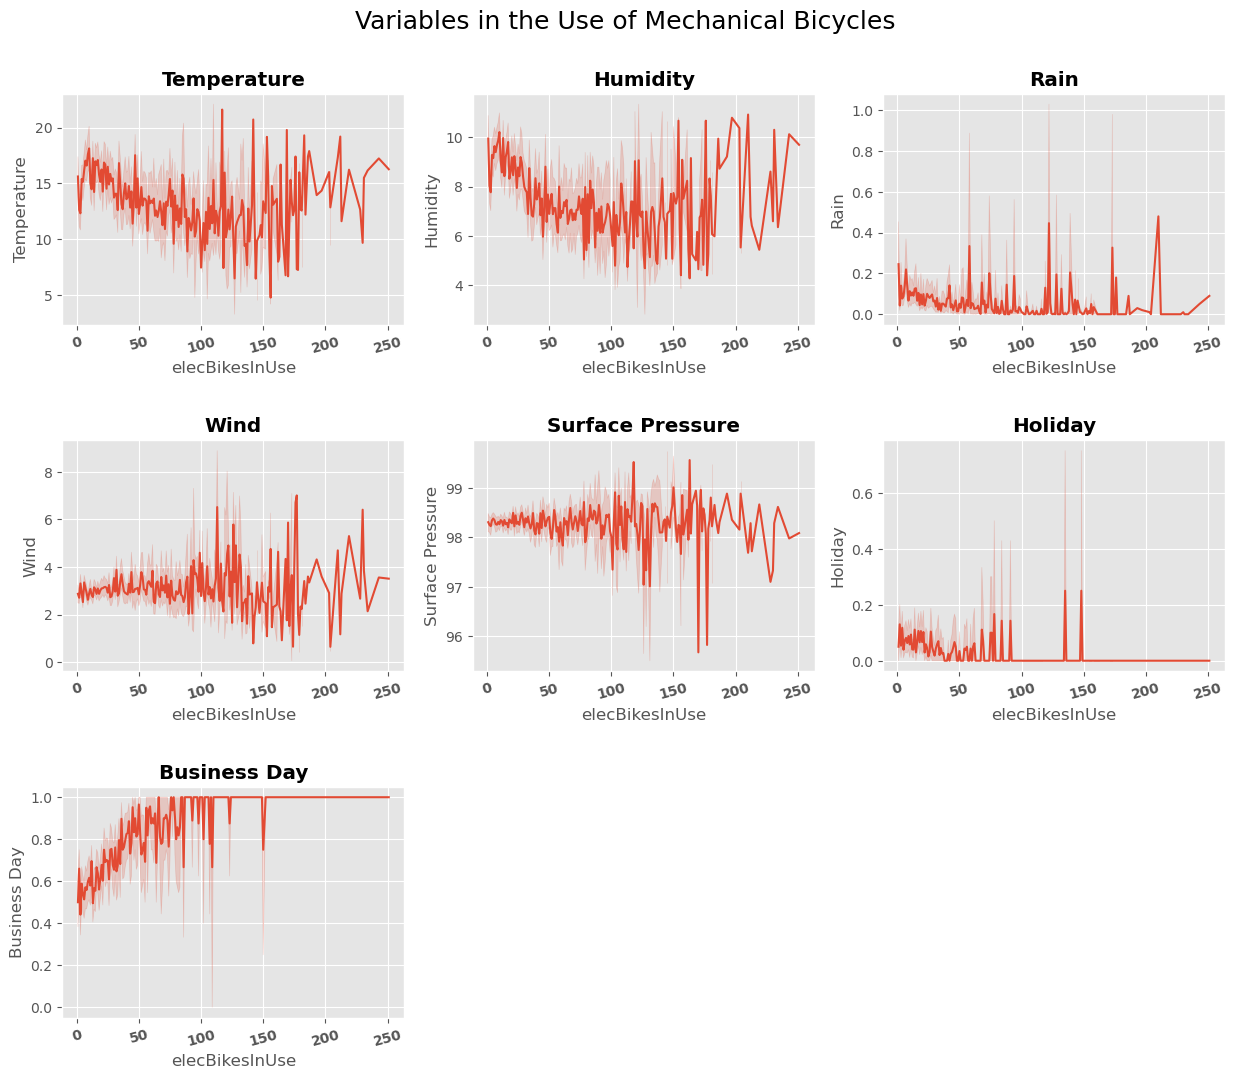

In [374]:
#use function (3) to plot the features by date
plot_variables_with_exeption(data_elecBikes_in_use_df,3,"elecBikesInUse","Date","Variables in the Use of Mechanical Bicycles","prepro_var_use_elecbikes.png") 

# Time Series Analysis  

In [375]:
#use function (14) and (15) to set the date column to index
time_series_mech = data_mechBikes_in_use_df.pipe(time_index,"Date").pipe(datetime_index,'H')
time_series_elec = data_elecBikes_in_use_df.pipe(time_index,"Date").pipe(datetime_index,'H')   

<Figure size 1500x1000 with 0 Axes>

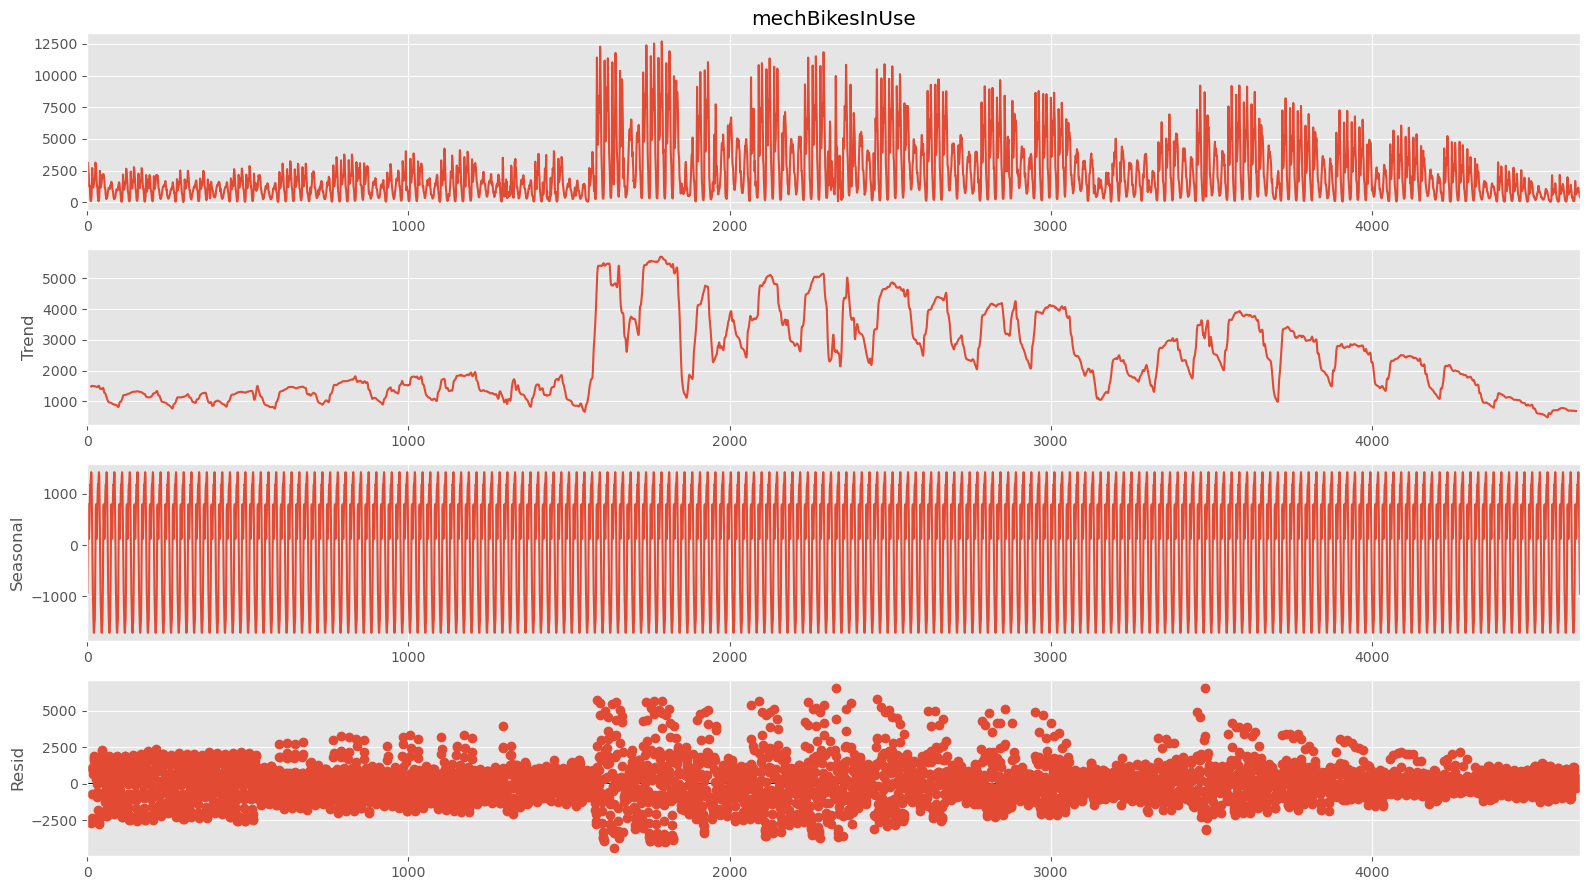

In [432]:
plt.figure(figsize=(15,10))
seasonal_descompose_mech = seasonal_decompose(data_mechBikes_in_use_df["mechBikesInUse"],
                                              model='additive',period=24)
fig = seasonal_descompose_mech.plot()
fig.set_size_inches((16, 9))
plt.tight_layout()
plt.show()
fig.savefig("mech_seasonal_descompose.png",bbox_inches='tight')

<Figure size 1500x1000 with 0 Axes>

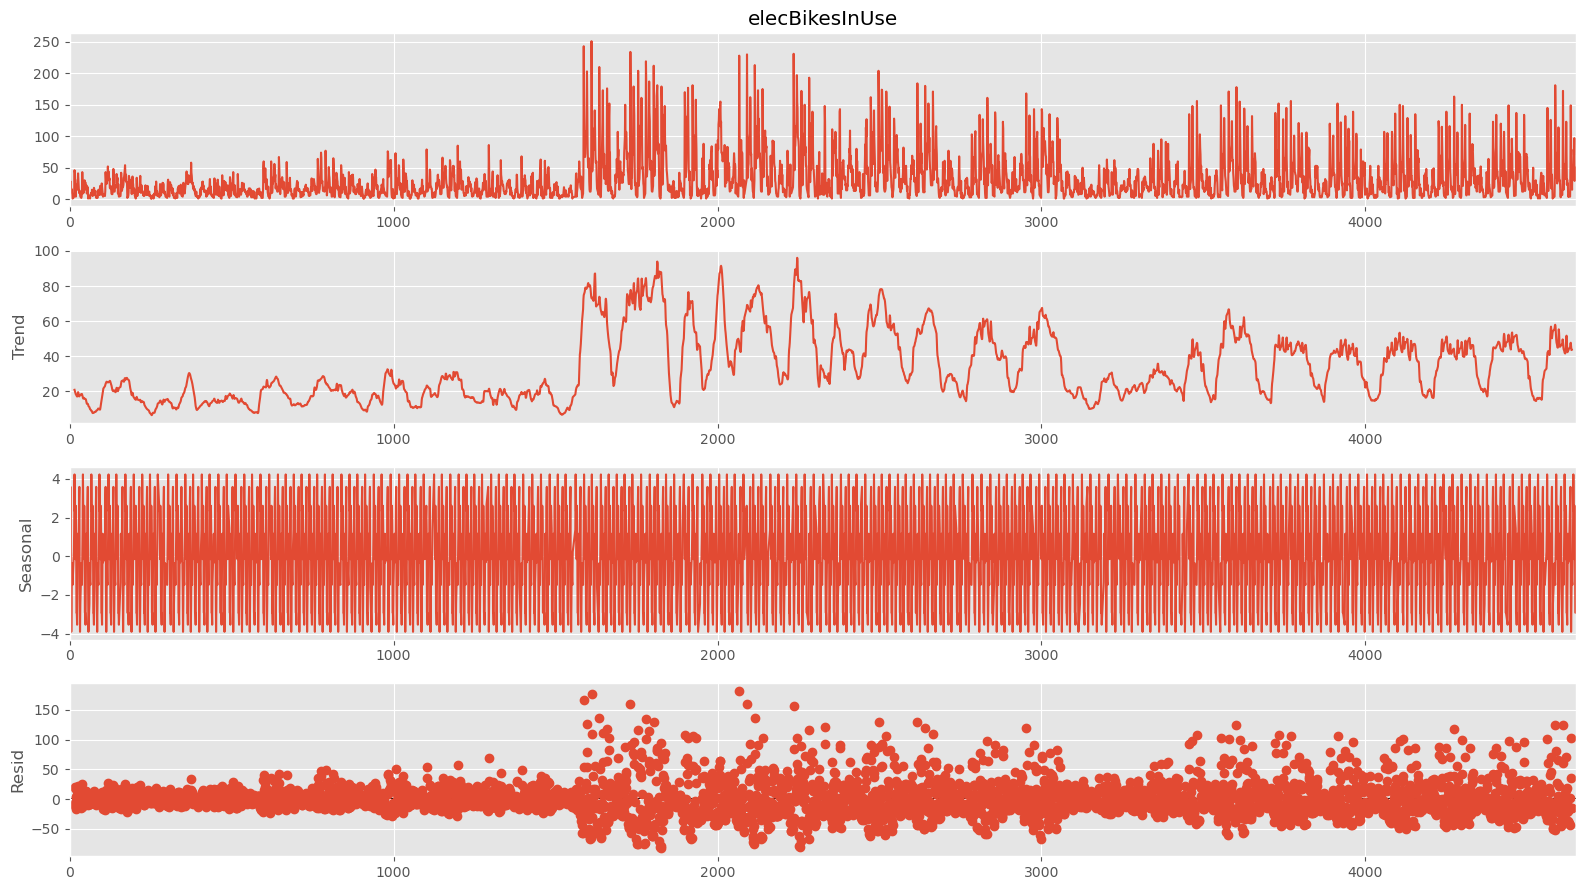

In [431]:
plt.figure(figsize=(15,10))
seasonal_descompose_mech = seasonal_decompose(data_elecBikes_in_use_df["elecBikesInUse"],
                                              model='additive',period=24)
fig = seasonal_descompose_mech.plot()
fig.set_size_inches((16, 9))
plt.tight_layout()
plt.show()
fig.savefig("elec_seasonal_descompose.png",bbox_inches='tight')

In [378]:
#data_elecBikes_in_use_df = data_elecBikes_in_use_df.asfreq('H')
#data_mechBikes_in_use_df = data_mechBikes_in_use_df.asfreq('H')

In [379]:
mech_target = time_series_mech.iloc[:,0]
mech_exog = time_series_mech.iloc[:,1:] 

In [380]:
mech_exog

Temperature  Humidity  Rain  Wind  Surface Pressure  \
Date                                                                    
2018-08-01 17:00        31.18     12.63   0.0  3.61             98.12   
2018-08-01 18:00        28.69     13.61   0.0  2.96             98.15   
2018-08-01 19:00        26.31     14.40   0.0  2.19             98.20   
2018-08-01 20:00        25.35     14.59   0.0  1.67             98.25   
2018-08-01 21:00        25.17     14.47   0.0  1.13             98.26   
...                       ...       ...   ...   ...               ...   
2019-02-28 19:00        11.06      6.84   0.0  1.39             98.87   
2019-02-28 20:00        10.22      6.96   0.0  1.25             98.89   
2019-02-28 21:00         9.25      7.20   0.0  1.59             98.89   
2019-02-28 22:00         8.63      7.32   0.0  1.91             98.87   
2019-02-28 23:00         8.27      7.14   0.0  2.12             98.85   

                  Holiday  Business Day  
Date                                     
2018-08-01 17:00        0             1  
2018-08-01 18:00        0             1  
2018-08-01 19:00        0             1  
2018-08-01 20:00        0             1  
2018-08-01 21:00        0             1  
...                   ...           ...  
2019-02-28 19:00        0             1  
2019-02-28 20:00        0             1  
2019-02-28 21:00        0             1  
2019-02-28 22:00        0             1  
2019-02-28 23:00        0             1  

[4650 rows x 7 columns]

In [381]:
ad_fuller_mech_result = adfuller(mech_target)

print(f'ADF Statistic: {ad_fuller_mech_result[0]}')
print(f'p-value: {ad_fuller_mech_result[1]}') 

ADF Statistic: -4.9649602933903765
p-value: 2.602364372208576e-05


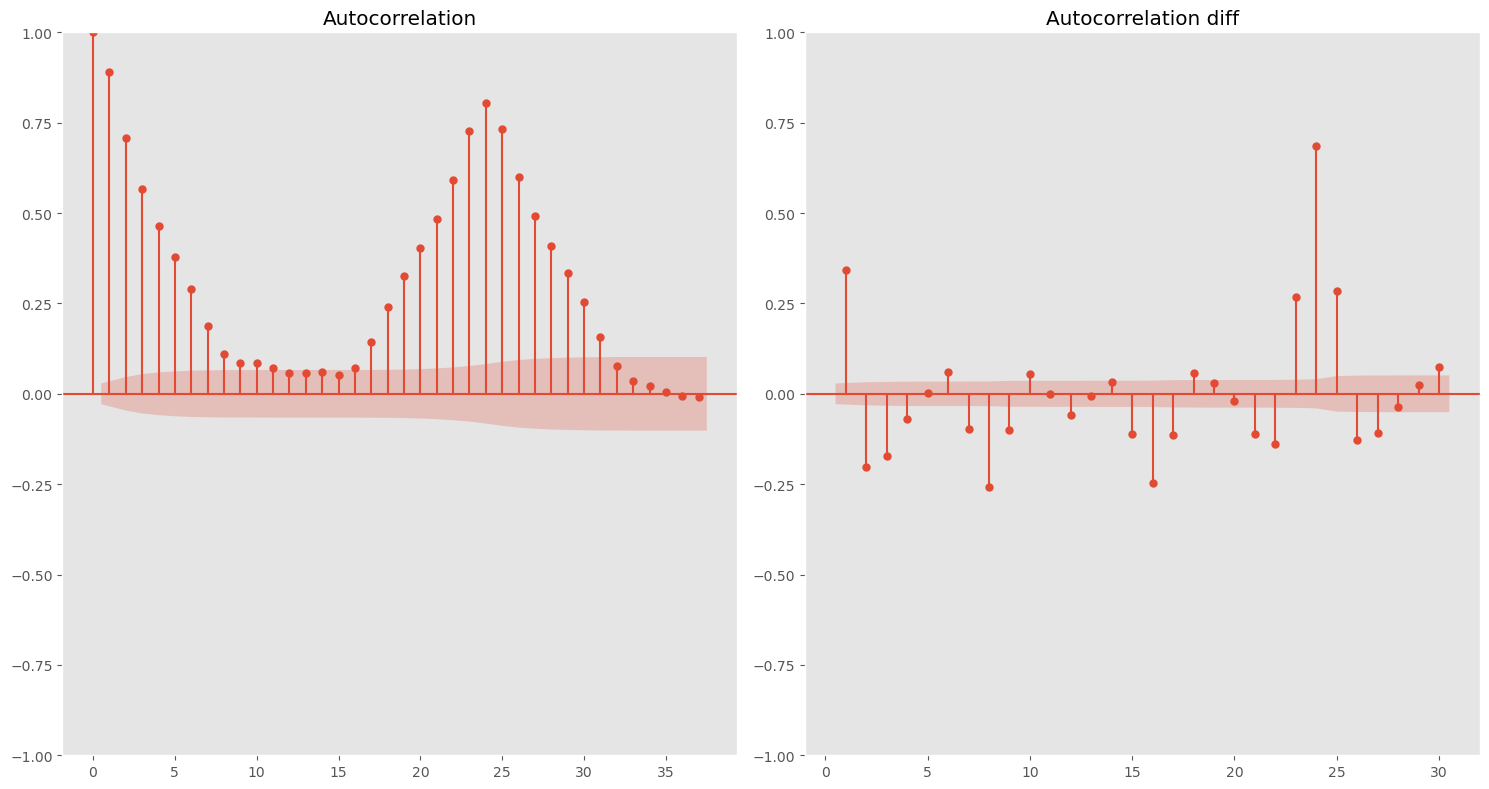

In [428]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))  
sm.graphics.tsa.plot_acf(data_mechBikes_in_use_df["mechBikesInUse"],ax=ax1)
sm.graphics.tsa.plot_acf(data_mechBikes_in_use_df["mechBikesInUse"].diff().dropna(),
                         lags=np.r_[1:31],ax=ax2)
[ax.grid() for ax in (ax1,ax2)]
plt.tight_layout()
plt.title("Autocorrelation diff")
plt.tight_layout()
plt.show()
fig.savefig("mech_autocorrelation.png",bbox_inches='tight')

In [383]:
elec_target = time_series_elec.iloc[:,0]
elec_exog = time_series_elec.iloc[:,1:]

In [384]:
elec_exog.head()

Temperature  Humidity  Rain  Wind  Surface Pressure  \
Date                                                                    
2018-08-01 17:00        31.18     12.63   0.0  3.61             98.12   
2018-08-01 18:00        28.69     13.61   0.0  2.96             98.15   
2018-08-01 19:00        26.31     14.40   0.0  2.19             98.20   
2018-08-01 20:00        25.35     14.59   0.0  1.67             98.25   
2018-08-01 21:00        25.17     14.47   0.0  1.13             98.26   

                  Holiday  Business Day  
Date                                     
2018-08-01 17:00        0             1  
2018-08-01 18:00        0             1  
2018-08-01 19:00        0             1  
2018-08-01 20:00        0             1  
2018-08-01 21:00        0             1

In [385]:
ad_fuller_elec_result = adfuller(elec_target)

print(f'ADF Statistic: {ad_fuller_elec_result[0]}')
print(f'p-value: {ad_fuller_elec_result[1]}') 

ADF Statistic: -6.693090764284095
p-value: 4.062888694864564e-09


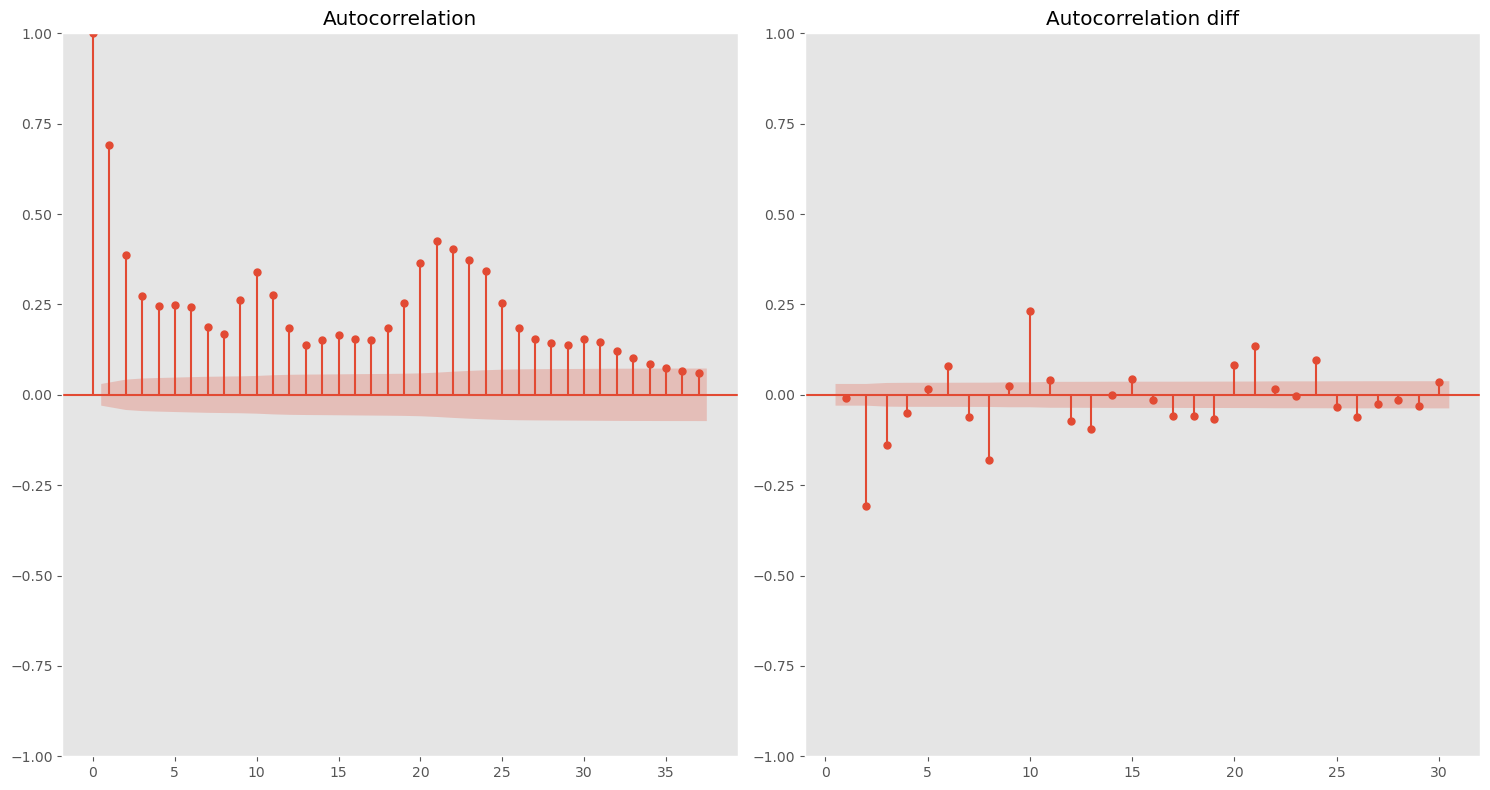

In [427]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8)) 
sm.graphics.tsa.plot_acf(data_elecBikes_in_use_df["elecBikesInUse"],ax=ax1)
sm.graphics.tsa.plot_acf(data_elecBikes_in_use_df["elecBikesInUse"].diff().dropna(), 
                         lags=np.r_[1:31],ax=ax2)
[ax.grid() for ax in (ax1,ax2)]
plt.title("Autocorrelation diff")
plt.tight_layout()
plt.show()
fig.savefig("elec_autocorrelation.png",bbox_inches='tight')

In [387]:
#split data 
X_mech_train,X_mech_test = split_time_series(mech_exog,.8)
y_mech_train,y_mech_test = split_time_series(mech_target,.8)
X_elec_train,X_elec_test = split_time_series(elec_exog,.8)
y_elec_train,y_elec_test = split_time_series(elec_target,.8)

In [78]:
X_elec_train.shape,X_elec_test.shape,y_elec_train.shape,y_elec_test.shape

((3414, 7), (854, 7), (3414,), (854,))

# Time Series Models

## Grid Search Time Series

In [79]:
def optimize_SARIMAX2(endog: Union[pd.Series, list], exog: Union[pd.Series, list], 
                     order_list: list,s: int) -> pd.DataFrame:
    
    results = []
    
    for order in order_list:
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], order[2], order[1]),
                seasonal_order=(order[3], order[5], order[4], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results,columns=['(p,q,d,P,Q,D)', 'AIC'])
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df 

## Mech Bikes

In [419]:
p_mech = range(0, 3, 1)
d_mech = range(0, 1, 1)
q_mech = range(0, 3, 1)
P_mech = range(0, 3, 1)
D_mech = range(0,2,1)
Q_mech = range(0, 3, 1)
s_mech = 24

parameters_mech = product(p_mech , q_mech ,d_mech , P_mech , Q_mech ,D_mech)
parameters_list_mech = list(parameters_mech)

In [420]:
result_mech_df = optimize_SARIMAX2(y_mech_train,X_mech_train,parameters_list_mech,s_mech)
result_mech_df

C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserW

(p,q,d,P,Q,D)           AIC
0   (1, 1, 0, 0, 1, 1)  59124.716296
1   (1, 1, 0, 1, 1, 1)  59268.481477
2   (1, 1, 0, 1, 0, 1)  59522.118425
3   (1, 1, 0, 1, 1, 0)  59550.562529
4   (1, 1, 0, 1, 0, 0)  59588.941069
5   (1, 1, 0, 0, 0, 1)  59748.511271
6   (1, 0, 0, 1, 1, 1)  59791.670678
7   (1, 0, 0, 0, 1, 1)  59835.710325
8   (1, 0, 0, 1, 0, 0)  60095.047473
9   (1, 0, 0, 1, 0, 1)  60108.519299
10  (1, 0, 0, 1, 1, 0)  60146.831341
11  (1, 0, 0, 0, 0, 1)  60191.440228
12  (1, 1, 0, 0, 1, 0)  60203.316745
13  (0, 1, 0, 0, 1, 1)  60362.548762
14  (0, 1, 0, 1, 0, 1)  60652.547204
15  (1, 0, 0, 0, 1, 0)  60806.425685
16  (0, 1, 0, 0, 0, 1)  60827.955732
17  (0, 1, 0, 1, 1, 1)  60862.592296
18  (0, 1, 0, 1, 0, 0)  60989.821721
19  (0, 1, 0, 1, 1, 0)  61041.638922
20  (1, 1, 0, 0, 0, 0)  61275.127032
21  (0, 1, 0, 0, 1, 0)  62170.777575
22  (1, 0, 0, 0, 0, 0)  62300.832537
23  (0, 0, 0, 1, 1, 1)  63548.923867
24  (0, 0, 0, 0, 1, 1)  63582.063753
25  (0, 0, 0, 1, 0, 1)  63583.775918
26  (0, 0, 0, 0, 0, 1)  63599.628677
27  (0, 1, 0, 0, 0, 0)  63719.939943
28  (0, 0, 0, 1, 1, 0)  63897.922505
29  (0, 0, 0, 1, 0, 0)  63920.231952
30  (0, 0, 0, 0, 1, 0)  65542.073311
31  (0, 0, 0, 0, 0, 0)  94319.840161

In [422]:
result_mech_df.iloc[0]

(p,q,d,P,Q,D)    (1, 1, 0, 0, 1, 1)
AIC                    59124.716296
Name: 0, dtype: object

In [417]:
optimal_model_1 = SARIMAX(y_mech_train,X_mech_train,order=(1,0,1),
                          seasonal_order=(0,1,1,24),
                          enforce_invertibility=False,freq='H').fit(disp=False)
optimal_model_1

C:\Users\formacio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [418]:
optimal_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     mechBikesInUse   No. Observations:                 3720
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 24)   Log Likelihood              -29551.217
Date:                            Thu, 27 Oct 2022   AIC                          59124.434
Time:                                    20:31:33   BIC                          59192.799
Sample:                                08-01-2018   HQIC                         59148.766
                                     - 01-21-2019                                         
Covariance Type:                              opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature        -60.7332     12.146     -5.000      0.000     -84.539     -36.927
Humidity           -71.5708     27.196     -2.632      0.008    -124.873     -18.268
Rain              -474.4552     55.551     -8.541      0.000    -583.333    -365.577
Wind                -0.3350     20.526     -0.016      0.987     -40.566      39.896
Surface Pressure    46.8202     18.421      2.542      0.011      10.715      82.925
Holiday           -527.3835    114.561     -4.604      0.000    -751.918    -302.849
Business Day       797.9743     57.233     13.943      0.000     685.799     910.149
ar.L1                0.6545      0.008     85.160      0.000       0.639       0.670
ma.L1                0.5311      0.010     51.824      0.000       0.511       0.551
ma.S.L24            -0.7140      0.006   -119.541      0.000      -0.726      -0.702
sigma2            5.012e+05   5630.827     89.010      0.000     4.9e+05    5.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):              8880.07
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               4.76   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

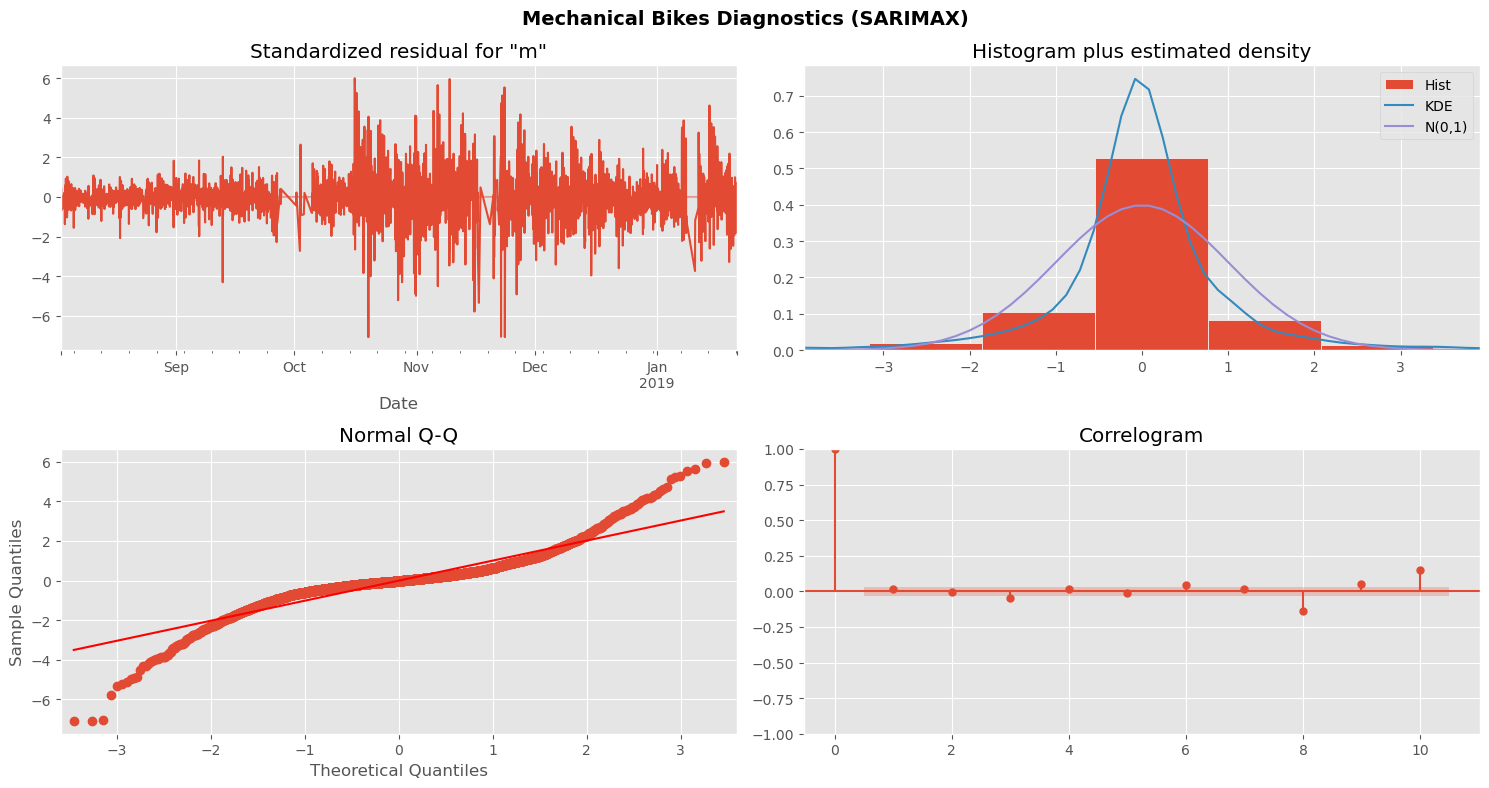

In [426]:
fig = optimal_model_1.plot_diagnostics(figsize=(15,8))
plt.suptitle("Mechanical Bikes Diagnostics (SARIMAX)", fontsize=14,fontweight='bold')
fig.tight_layout()
plt.show()
fig.figure.savefig("mech_diagnostics.png",bbox_inches='tight')

In [420]:
residuals = optimal_model_1.resid

p_value = acorr_ljungbox(residuals,np.arange(1,11,1))

print(p_value)

       lb_stat     lb_pvalue
1     1.027139  3.108317e-01
2     1.028940  5.978173e-01
3     7.088281  6.913657e-02
4     8.365418  7.907323e-02
5     8.608172  1.257511e-01
6    17.635451  7.210820e-03
7    19.325540  7.226448e-03
8    90.862292  3.107373e-16
9   100.980200  9.966601e-18
10  183.532590  4.325746e-34


## Elec Bikes

In [106]:
p_elec = range(0, 2, 1)
d_elec = range(0,1,1)
q_elec = range(0, 2, 1)
P_elec = range(0, 2, 1)
D_elec = range(0,2,1)
Q_elec = range(0, 2, 1)
s_elec = 24

parameters_elec = product(p_elec, q_elec,d_elec, P_elec, Q_elec,D_elec)
parameters_list_elec = list(parameters_elec)

In [107]:
result_elec_df = optimize_SARIMAX2(y_elec_train,X_elec_train,parameters_list_elec,s_elec)
result_elec_df

C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\debyf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

(p,q,d,P,Q,D)           AIC
0   (1, 1, 0, 1, 1, 1)  11778.498443
1   (1, 1, 0, 0, 1, 1)  11779.126893
2   (0, 1, 0, 1, 1, 1)  11795.619273
3   (0, 1, 0, 0, 1, 1)  11796.430599
4   (1, 0, 0, 0, 1, 1)  11873.607717
5   (1, 0, 0, 1, 1, 1)  11874.952857
6   (1, 1, 0, 0, 1, 0)  11903.303209
7   (1, 1, 0, 1, 0, 0)  11903.597804
8   (1, 1, 0, 0, 0, 0)  11904.596340
9   (1, 1, 0, 1, 1, 0)  11905.070596
10  (0, 1, 0, 0, 1, 0)  11919.898647
11  (0, 1, 0, 1, 0, 0)  11920.192308
12  (0, 1, 0, 1, 1, 0)  11921.377457
13  (0, 1, 0, 0, 0, 0)  11921.405395
14  (1, 0, 0, 0, 0, 0)  12001.895973
15  (1, 0, 0, 0, 1, 0)  12002.792565
16  (1, 0, 0, 1, 0, 0)  12002.908217
17  (1, 0, 0, 1, 1, 0)  12004.612709
18  (1, 1, 0, 1, 0, 1)  12217.389197
19  (0, 1, 0, 1, 0, 1)  12235.411328
20  (0, 0, 0, 1, 1, 1)  12239.402998
21  (0, 0, 0, 0, 1, 1)  12240.405032
22  (1, 0, 0, 1, 0, 1)  12325.607861
23  (0, 0, 0, 0, 1, 0)  12372.141847
24  (0, 0, 0, 1, 0, 0)  12372.715951
25  (0, 0, 0, 1, 1, 0)  12372.927658
26  (0, 0, 0, 0, 0, 0)  12374.642306
27  (1, 1, 0, 0, 0, 1)  12500.961556
28  (0, 1, 0, 0, 0, 1)  12513.037286
29  (1, 0, 0, 0, 0, 1)  12622.456639
30  (0, 0, 0, 1, 0, 1)  12688.534515
31  (0, 0, 0, 0, 0, 1)  12941.560493

In [412]:
optimal_model_elec_1 = SARIMAX(y_elec_train,X_elec_train,order=(1,0,1),seasonal_order=(1,1,1,24),simple_differencing=False).fit(disp=False)
optimal_model_elec_1

C:\Users\formacio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [413]:
optimal_model_elec_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     elecBikesInUse   No. Observations:                 3414
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 24)   Log Likelihood              -15472.207
Date:                            Thu, 27 Oct 2022   AIC                          30968.415
Time:                                    20:29:56   BIC                          31041.958
Sample:                                08-01-2018   HQIC                         30994.704
                                     - 01-20-2019                                         
Covariance Type:                              opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature          0.0851      0.288      0.295      0.768      -0.480       0.650
Humidity            -0.6806      0.539     -1.262      0.207      -1.737       0.376
Rain                -6.0930      2.615     -2.330      0.020     -11.219      -0.967
Wind                -0.1252      0.518     -0.242      0.809      -1.141       0.891
Surface Pressure     0.9730      1.603      0.607      0.544      -2.169       4.115
Holiday            -14.0879      4.450     -3.166      0.002     -22.810      -5.366
Business Day        14.5569      2.508      5.805      0.000       9.642      19.472
ar.L1                0.3963      0.018     21.797      0.000       0.361       0.432
ma.L1                0.4024      0.018     22.599      0.000       0.367       0.437
ar.S.L24             0.1898      0.010     19.178      0.000       0.170       0.209
ma.S.L24            -0.9579      0.005   -181.762      0.000      -0.968      -0.948
sigma2             522.5436      5.578     93.671      0.000     511.610     533.477
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             31751.58
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               5.33   Skew:                             2.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

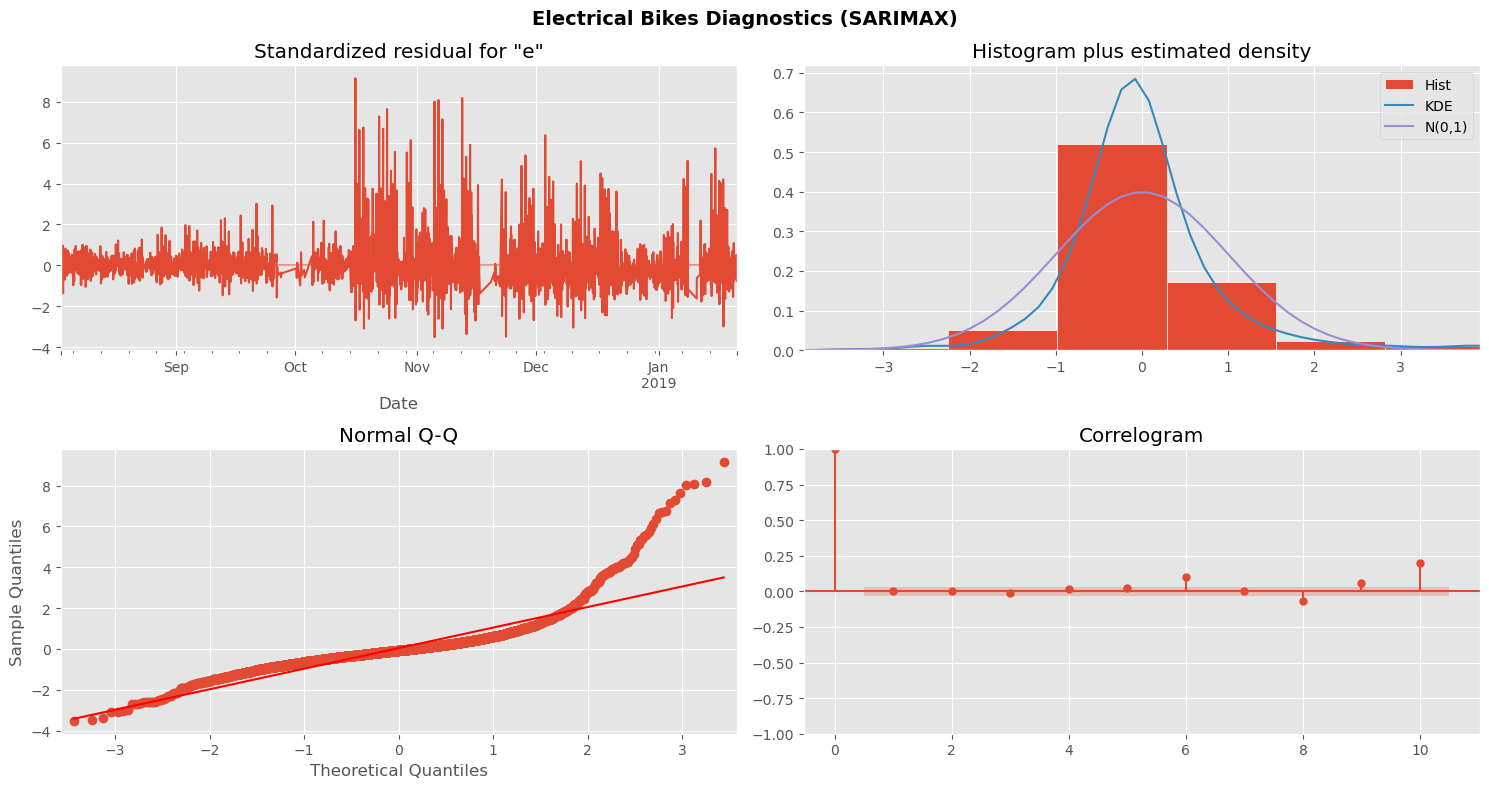

In [424]:
fig = optimal_model_elec_1.plot_diagnostics(figsize=(15,8))
plt.suptitle("Electrical Bikes Diagnostics (SARIMAX)", fontsize=14,fontweight='bold')
fig.tight_layout()
plt.show()
fig.figure.savefig("elec_diagnostics.png",bbox_inches='tight')

In [415]:
residuals_elec_1 = optimal_model_elec_1.resid

lbvalue_elec_1,p_value_elec_1 = acorr_ljungbox(residuals_elec_1,np.arange(1,11,1))

print(acorr_ljungbox(residuals_elec_1,np.arange(1,11,1)))



       lb_stat     lb_pvalue
1    23.198402  1.461187e-06
2    46.803671  6.866130e-11
3    61.827182  2.392154e-13
4    88.035910  3.440573e-18
5   118.282809  7.250756e-24
6   206.970446  6.223837e-42
7   221.437095  3.268497e-44
8   221.529297  1.829748e-43
9   262.264124  2.558959e-51
10  448.385595  4.617040e-90


# Auto-Arima

In [79]:
autoarima_model = pm.auto_arima(y_mech_train, exogenous=X_mech_train,
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=2, max_q=2, m=24,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[24] intercept   : AIC=63584.148, Time=8.83 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=63601.136, Time=0.97 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=60110.455, Time=65.32 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=60369.678, Time=66.85 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=63599.629, Time=7.86 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=60189.689, Time=26.07 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=59896.718, Time=162.92 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=60013.901, Time=177.30 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=62.36 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=63558.974, Time=34.10 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=59402.613, Time=166.98 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=59607.814, Time=72.29 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=59470.768, Time=169.43 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=59653.688, Time=78.30 

In [80]:
autoarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3720
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 24)   Log Likelihood              -29576.972
Date:                            Thu, 27 Oct 2022   AIC                          59181.944
Time:                                    17:43:51   BIC                          59268.954
Sample:                                08-01-2018   HQIC                         59212.910
                                     - 01-21-2019                                         
Covariance Type:                              opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept          -47.4016      8.057     -5.883      0.000     -63.194     -31.609
Temperature        -81.8499     17.088     -4.790      0.000    -115.342     -48.358
Humidity           -74.0534     40.123     -1.846      0.065    -152.692       4.585
Rain              -475.4237     72.998     -6.513      0.000    -618.497    -332.351
Wind                 5.0217     28.353      0.177      0.859     -50.548      60.592
Surface Pressure   112.7738      9.309     12.114      0.000      94.528     131.020
Holiday           -529.4860    120.311     -4.401      0.000    -765.291    -293.681
Business Day       812.7432     83.397      9.745      0.000     649.288     976.198
ar.L1                0.6790      0.011     61.930      0.000       0.658       0.700
ma.L1                0.4902      0.015     32.864      0.000       0.461       0.519
ar.S.L24             0.2693      0.022     12.219      0.000       0.226       0.313
ar.S.L48            -0.1239      0.017     -7.279      0.000      -0.157      -0.091
ma.S.L24            -0.7397      0.019    -38.891      0.000      -0.777      -0.702
sigma2            6.856e+05   1.11e+04     61.543      0.000    6.64e+05    7.07e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):             12371.20
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
autoarima_model.fit(y_mech_train)

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(2, 1, 1, 24),
      suppress_warnings=True)

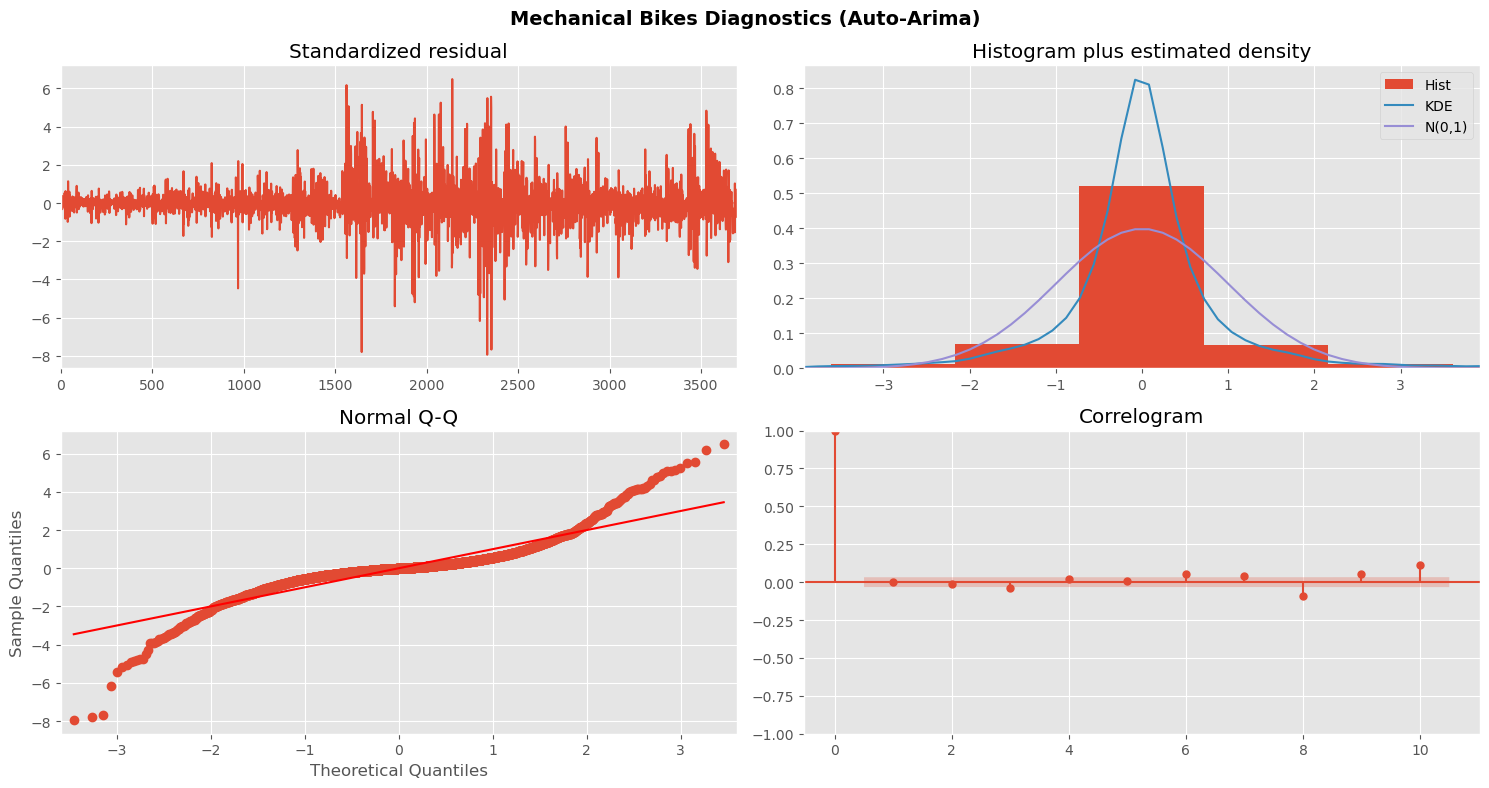

In [425]:
fig = autoarima_model.plot_diagnostics(figsize=(15, 8))
plt.suptitle("Mechanical Bikes Diagnostics (Auto-Arima)", fontsize=14,fontweight='bold')
fig.tight_layout()
plt.show()
fig.figure.savefig("autoarima_mech_diagnostics.png",bbox_inches='tight')

In [83]:
residuals_mech_autoarima = autoarima_model.resid()

acorr_ljungbox_results = acorr_ljungbox(residuals_mech_autoarima,np.arange(1,11,1))

print(acorr_ljungbox_results)

       lb_stat     lb_pvalue
1     0.515500  4.727678e-01
2     0.933390  6.270714e-01
3     5.832188  1.200663e-01
4     7.320931  1.198697e-01
5     7.451029  1.891987e-01
6    19.618953  3.236524e-03
7    25.923283  5.198143e-04
8    54.223648  6.247192e-09
9    65.745184  1.033100e-10
10  113.418853  1.088892e-19


## Prediction

In [394]:
# Forecast
n_periods = 930
fitted, confint = autoarima_model.predict(n_periods=n_periods,return_conf_int=True)

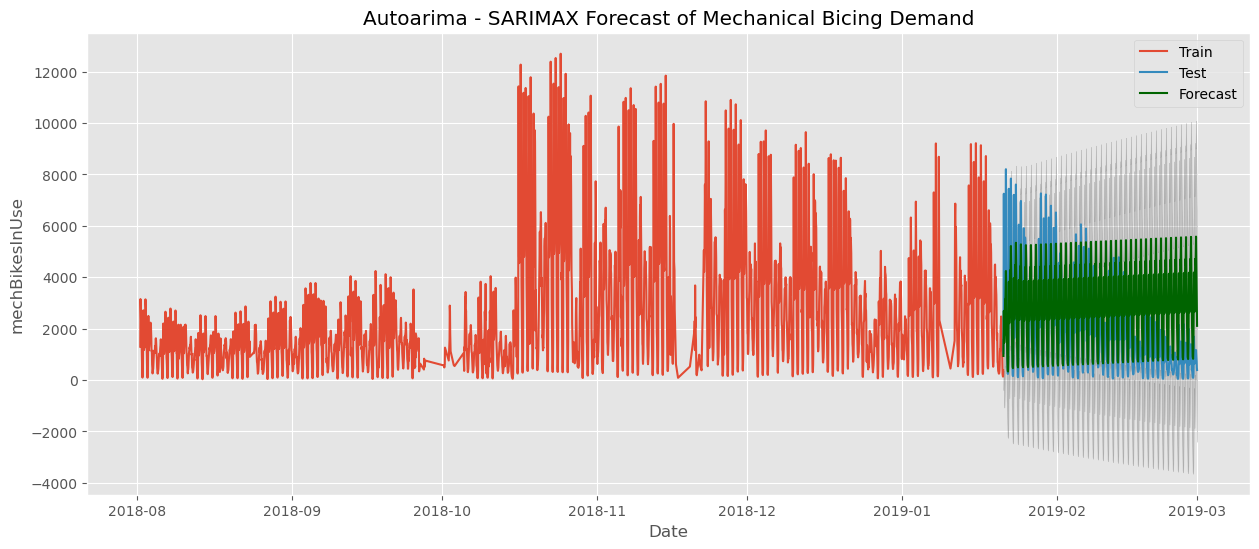

In [395]:
index_of_fc = pd.date_range('2019-01-21 06:00', periods = n_periods, freq='H')

# make series for plotting purpose
mech_fitted_series = pd.Series(fitted,name='Forecast', index=index_of_fc )
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(15,6))
#sns.lineplot(data = mechBikes_in_use_df, x= "Date", y ="mechBikesInUse",)
#sns.lineplot(data = mechBikes_in_use_df, x= "Date", y ="mechBikesInUse")
fig = sns.lineplot(data = mechBikes_in_use_df.iloc[:len(y_mech_train)], x= "Date", y ="mechBikesInUse",label="Train")
fig = sns.lineplot(data=mechBikes_in_use_df.iloc[len(y_mech_train):], x= "Date", y ="mechBikesInUse",label="Test")
fig = sns.lineplot(data= mech_fitted_series, color='darkgreen',label="Forecast")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Autoarima - SARIMAX Forecast of Mechanical Bicing Demand")
plt.show()
fig.figure.savefig("SARIMAX all Bicing Demand.png",bbox_inches='tight')

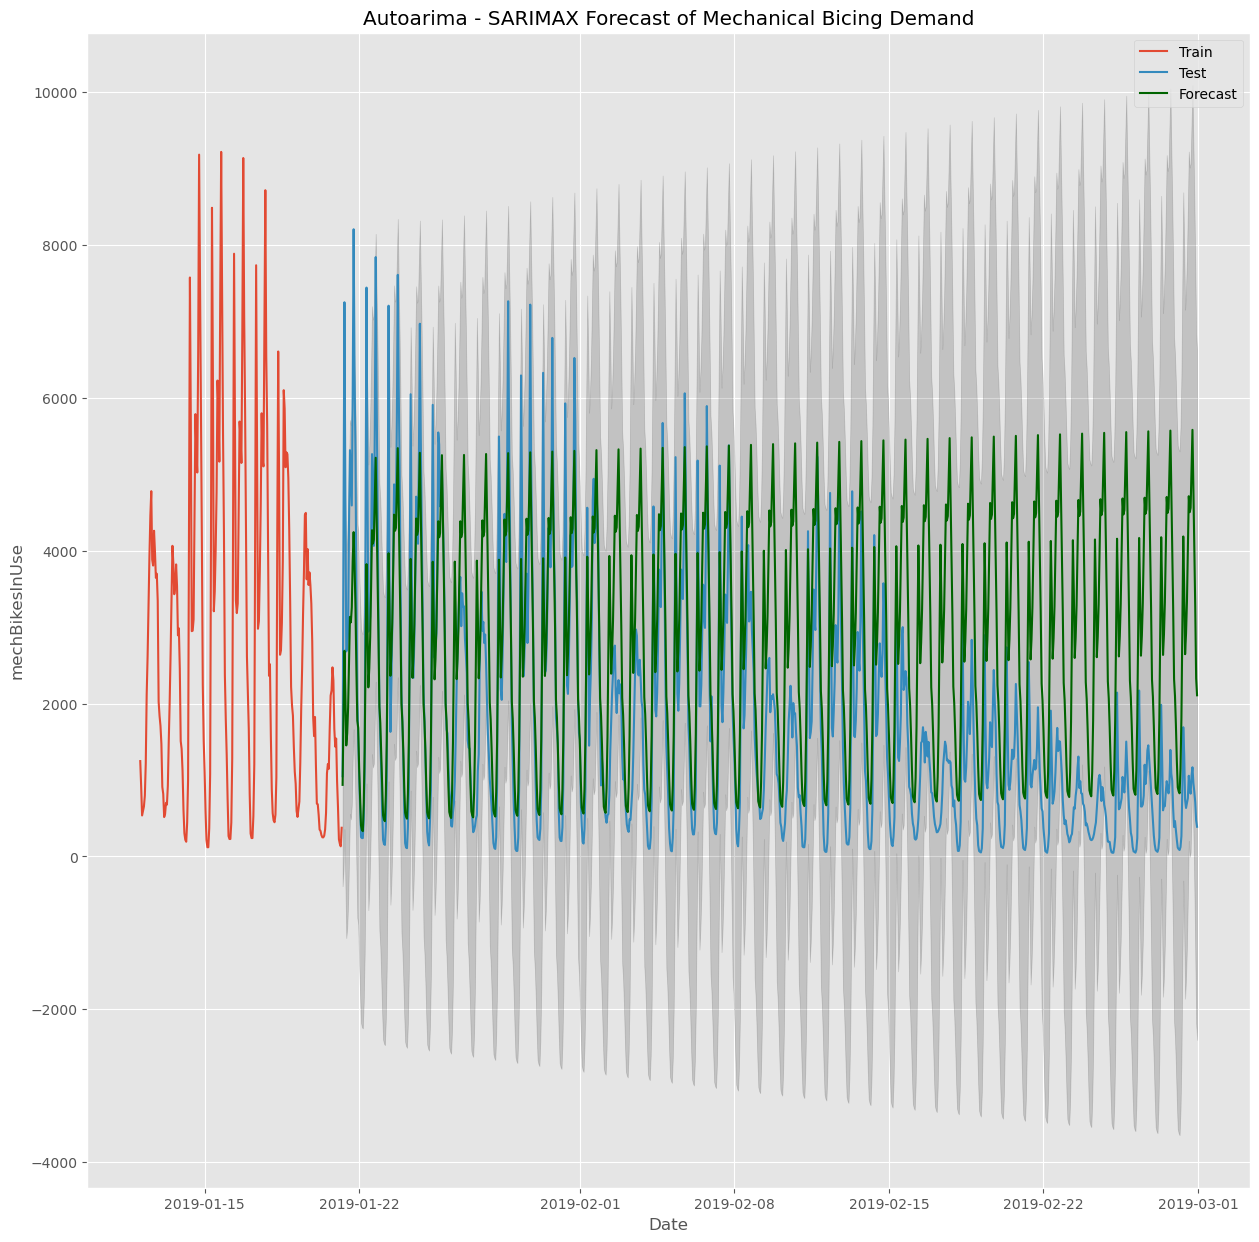

In [396]:
"""index_of_fc = pd.date_range('2019-03-03 10:00', periods = n_periods, freq='H')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc,name='Forecast' )
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)"""

# Plot
plt.figure(figsize=(15,15))
fig = sns.lineplot(data =  mechBikes_in_use_df.iloc[3500:len(y_mech_train)], x= "Date", y ="mechBikesInUse",label='Train')
fig = sns.lineplot(data = mechBikes_in_use_df.iloc[len(y_mech_train):], x= "Date", y ="mechBikesInUse",label='Test')
fig = sns.lineplot(data= mech_fitted_series, color='darkgreen',label='Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Autoarima - SARIMAX Forecast of Mechanical Bicing Demand")
#plt.legend()
plt.show()
fig.figure.savefig("SARIMAX short Bicing Demand.png", bbox_inches='tight')

In [174]:
mechBikes_Actual = y_mech_test.reset_index(drop=True)
mechBikes_Actual

0      1049
1      4349
2      7249
3      4739
4      2682
       ... 
925     961
926     847
927     713
928     470
929     388
Name: mechBikesInUse, Length: 930, dtype: int64

In [175]:
mechBikes_Forecast = mech_fitted_series.reset_index(drop=True)
mechBikes_Forecast

0       936.121417
1      1874.663135
2      2689.903798
3      2130.939367
4      1452.386351
          ...     
925    4821.797287
926    4123.680043
927    3271.286759
928    2329.110586
929    2107.786425
Name: Forecast, Length: 930, dtype: float64

In [195]:
evaluate_mech_df = pd.concat([mechBikes_Actual,mechBikes_Forecast],axis=1)
evaluate_mech_df.dropna(inplace=True)
evaluate_mech_df

mechBikesInUse     Forecast
0              1049   936.121417
1              4349  1874.663135
2              7249  2689.903798
3              4739  2130.939367
4              2682  1452.386351
..              ...          ...
925             961  4821.797287
926             847  4123.680043
927             713  3271.286759
928             470  2329.110586
929             388  2107.786425

[930 rows x 2 columns]

In [169]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [259]:
mech_error = rmse(evaluate_mech_df['Forecast'],evaluate_mech_df['mechBikesInUse'])
mech_error

1684.7689896935956

In [260]:
mech_mape = mape(evaluate_mech_df['mechBikesInUse'],evaluate_mech_df['Forecast'])
mech_mape

191.12364003105046

In [261]:
mech_mae = mean_absolute_error(evaluate_mech_df['mechBikesInUse'],evaluate_mech_df['Forecast'])
mech_mae

1306.425706536433

# Auto-Arima Electrical

In [89]:
autoarima_model_elec = pm.auto_arima(y_elec_train, exogenous=X_elec_train,
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=2, max_q=2, m=24,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[24] intercept   : AIC=inf, Time=44.05 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=34031.527, Time=1.24 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=32186.770, Time=51.05 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=49.46 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=34029.777, Time=4.89 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=32768.733, Time=11.47 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=31897.092, Time=110.09 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=131.81 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=51.40 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=33312.820, Time=139.59 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=31650.108, Time=122.67 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=31920.006, Time=62.11 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=136.19 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=51.03 sec
 ARIMA(2,0,1)(2,1,0)[24]

In [90]:
autoarima_model_elec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 3414
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 24)   Log Likelihood              -15803.391
Date:                             Thu, 27 Oct 2022   AIC                          31632.782
Time:                                     18:33:37   BIC                          31712.454
Sample:                                 08-01-2018   HQIC                         31661.262
                                      - 01-20-2019                                         
Covariance Type:                               opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Temperature          0.9200      0.266      3.464      0.001       0.399       1.440
Humidity             1.5791      0.628      2.516      0.012       0.349       2.809
Rain                -7.7716      2.090     -3.719      0.000     -11.868      -3.676
Wind                 0.0833      0.446      0.187      0.852      -0.791       0.957
Surface Pressure     6.4288      1.579      4.071      0.000       3.333       9.524
Holiday            -14.2054      3.382     -4.200      0.000     -20.834      -7.577
Business Day        15.3617      1.846      8.321      0.000      11.743      18.980
ar.L1                0.4837      0.051      9.469      0.000       0.384       0.584
ar.L2               -0.1146      0.035     -3.267      0.001      -0.183      -0.046
ma.L1                0.2821      0.052      5.430      0.000       0.180       0.384
ar.S.L24            -0.5002      0.009    -53.763      0.000      -0.518      -0.482
ar.S.L48            -0.2806      0.010    -26.732      0.000      -0.301      -0.260
sigma2             656.5018      7.694     85.328      0.000     641.422     671.581
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15863.57
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.33   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
autoarima_model_elec.fit(y_elec_train)

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(2, 1, 0, 24),
      suppress_warnings=True, with_intercept=False)

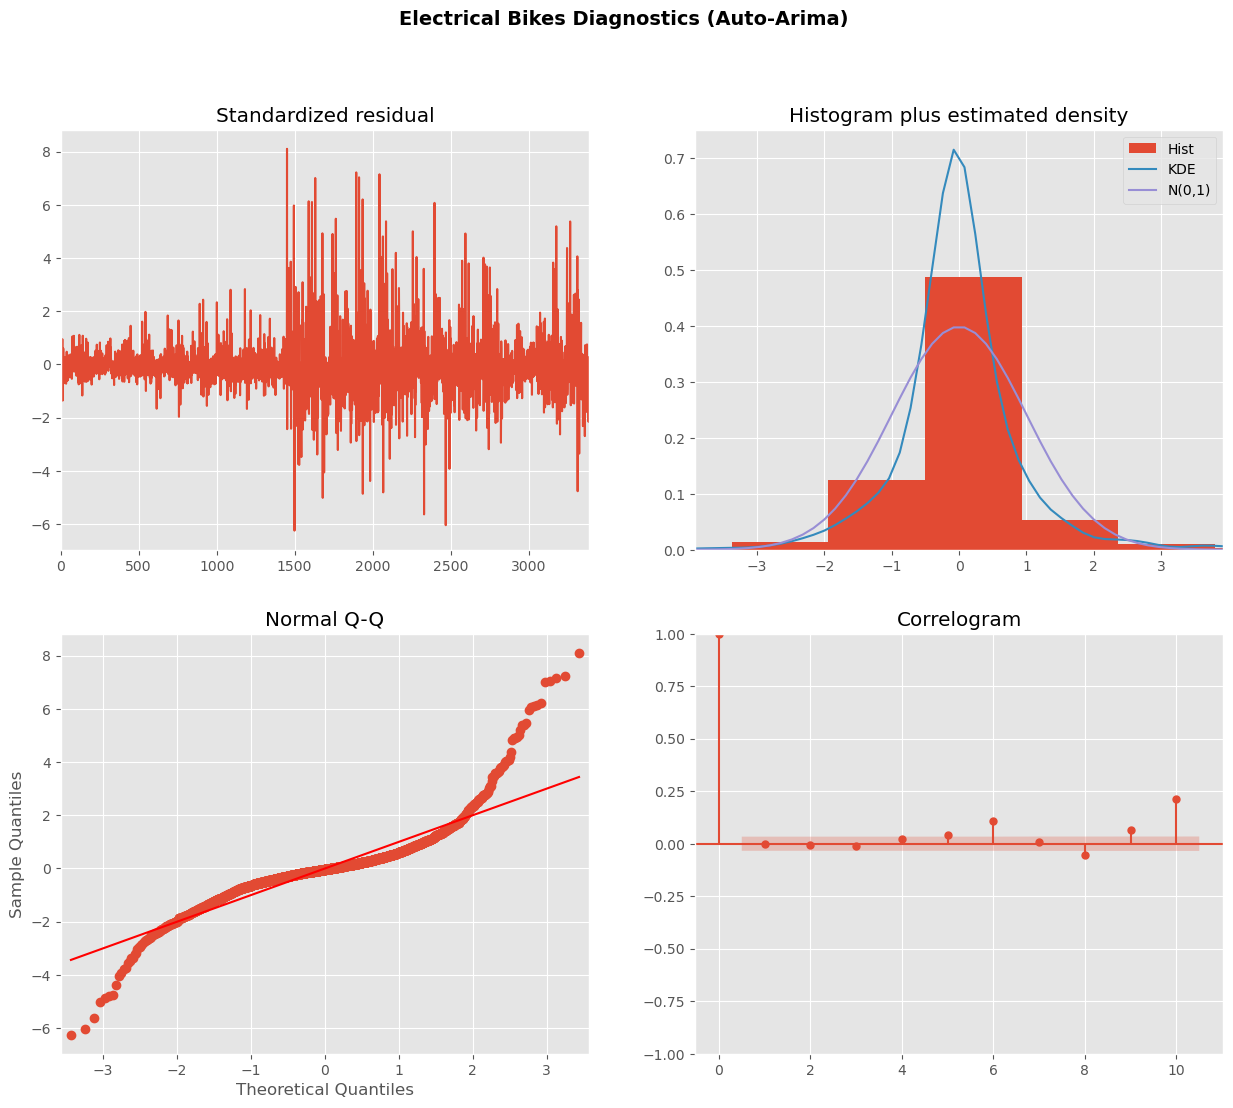

In [410]:
fig = autoarima_model_elec.plot_diagnostics(figsize=(15, 12))
plt.suptitle("Electrical Bikes Diagnostics (Auto-Arima)", fontsize=14,fontweight='bold')
plt.show()
fig.figure.savefig("autoarima_elec_diagnostics.png",bbox_inches='tight')

In [93]:
residuals_elec_autoarima = autoarima_model_elec.resid()

acorr_ljungbox_results_elec_autoarima = acorr_ljungbox(residuals_elec_autoarima,np.arange(1,11,1))

print(acorr_ljungbox_results_elec_autoarima)

       lb_stat     lb_pvalue
1     0.078875  7.788275e-01
2     0.121342  9.411330e-01
3     0.294947  9.609760e-01
4     2.287010  6.831351e-01
5     9.381881  9.476790e-02
6    49.783654  5.194690e-09
7    50.122246  1.366820e-08
8    59.615879  5.543872e-10
9    75.421903  1.304413e-12
10  233.053571  1.966016e-44


In [209]:
elecBikes_in_use_df

Date  elecBikesInUse    T2M   QV2M  PRECTOTCORR  WS10M  \
0    2018-08-01 17:00:00              30  31.18  12.63          0.0   3.61   
1    2018-08-01 18:00:00              49  28.69  13.61          0.0   2.96   
2    2018-08-01 19:00:00              20  26.31  14.40          0.0   2.19   
3    2018-08-01 20:00:00              28  25.35  14.59          0.0   1.67   
4    2018-08-01 21:00:00              20  25.17  14.47          0.0   1.13   
...                  ...             ...    ...    ...          ...    ...   
4645 2019-02-28 19:00:00              97  11.06   6.84          0.0   1.39   
4646 2019-02-28 20:00:00              29  10.22   6.96          0.0   1.25   
4647 2019-02-28 21:00:00              49   9.25   7.20          0.0   1.59   
4648 2019-02-28 22:00:00              50   8.63   7.32          0.0   1.91   
4649 2019-02-28 23:00:00              46   8.27   7.14          0.0   2.12   

         PS  Holiday  Business Day  
0     98.12        0             1  
1     98.15        0             1  
2     98.20        0             1  
3     98.25        0             1  
4     98.26        0             1  
...     ...      ...           ...  
4645  98.87        0             1  
4646  98.89        0             1  
4647  98.89        0             1  
4648  98.87        0             1  
4649  98.85        0             1  

[4650 rows x 9 columns]

In [403]:
# Forecast
n_periods = 1306
fitted, confint = autoarima_model_elec.predict(n_periods=n_periods,return_conf_int=True)

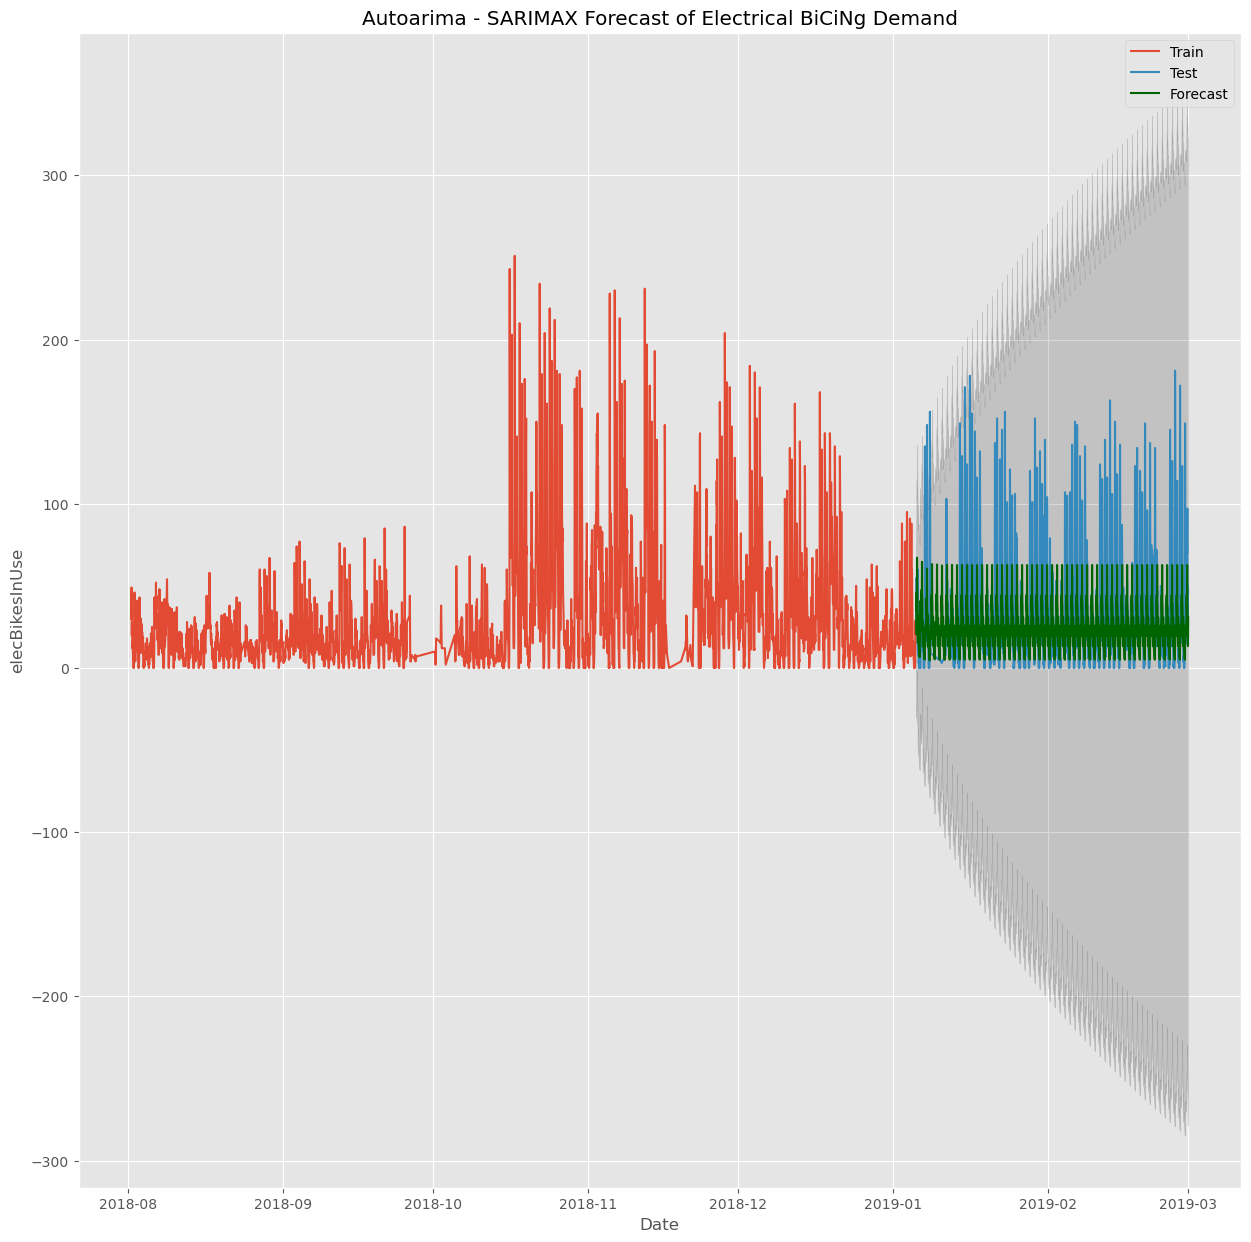

In [404]:
#index_of_fc = pd.date_range(start='2019-01-20 19:00', periods = n_periods, freq='H')
index_of_fc = pd.date_range(start='2019-01-05 14:00', periods = n_periods, freq='H')


# make series for plotting purpose
elec_fitted_series = pd.Series(fitted,name='Forecast', index=index_of_fc )
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(15,15))
fig = sns.lineplot(data =  elecBikes_in_use_df.iloc[:len(y_elec_train)], x= "Date", y ="elecBikesInUse",label='Train')
fig = sns.lineplot(data =  elecBikes_in_use_df.iloc[len(y_elec_train):], x= "Date", y ="elecBikesInUse",label='Test')
fig = sns.lineplot(data = elec_fitted_series, color='darkgreen',label='Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Autoarima - SARIMAX Forecast of Electrical BiCiNg Demand")
plt.show()
fig.figure.savefig("SARIMAX all electric Bicing Demand.png", bbox_inches='tight')

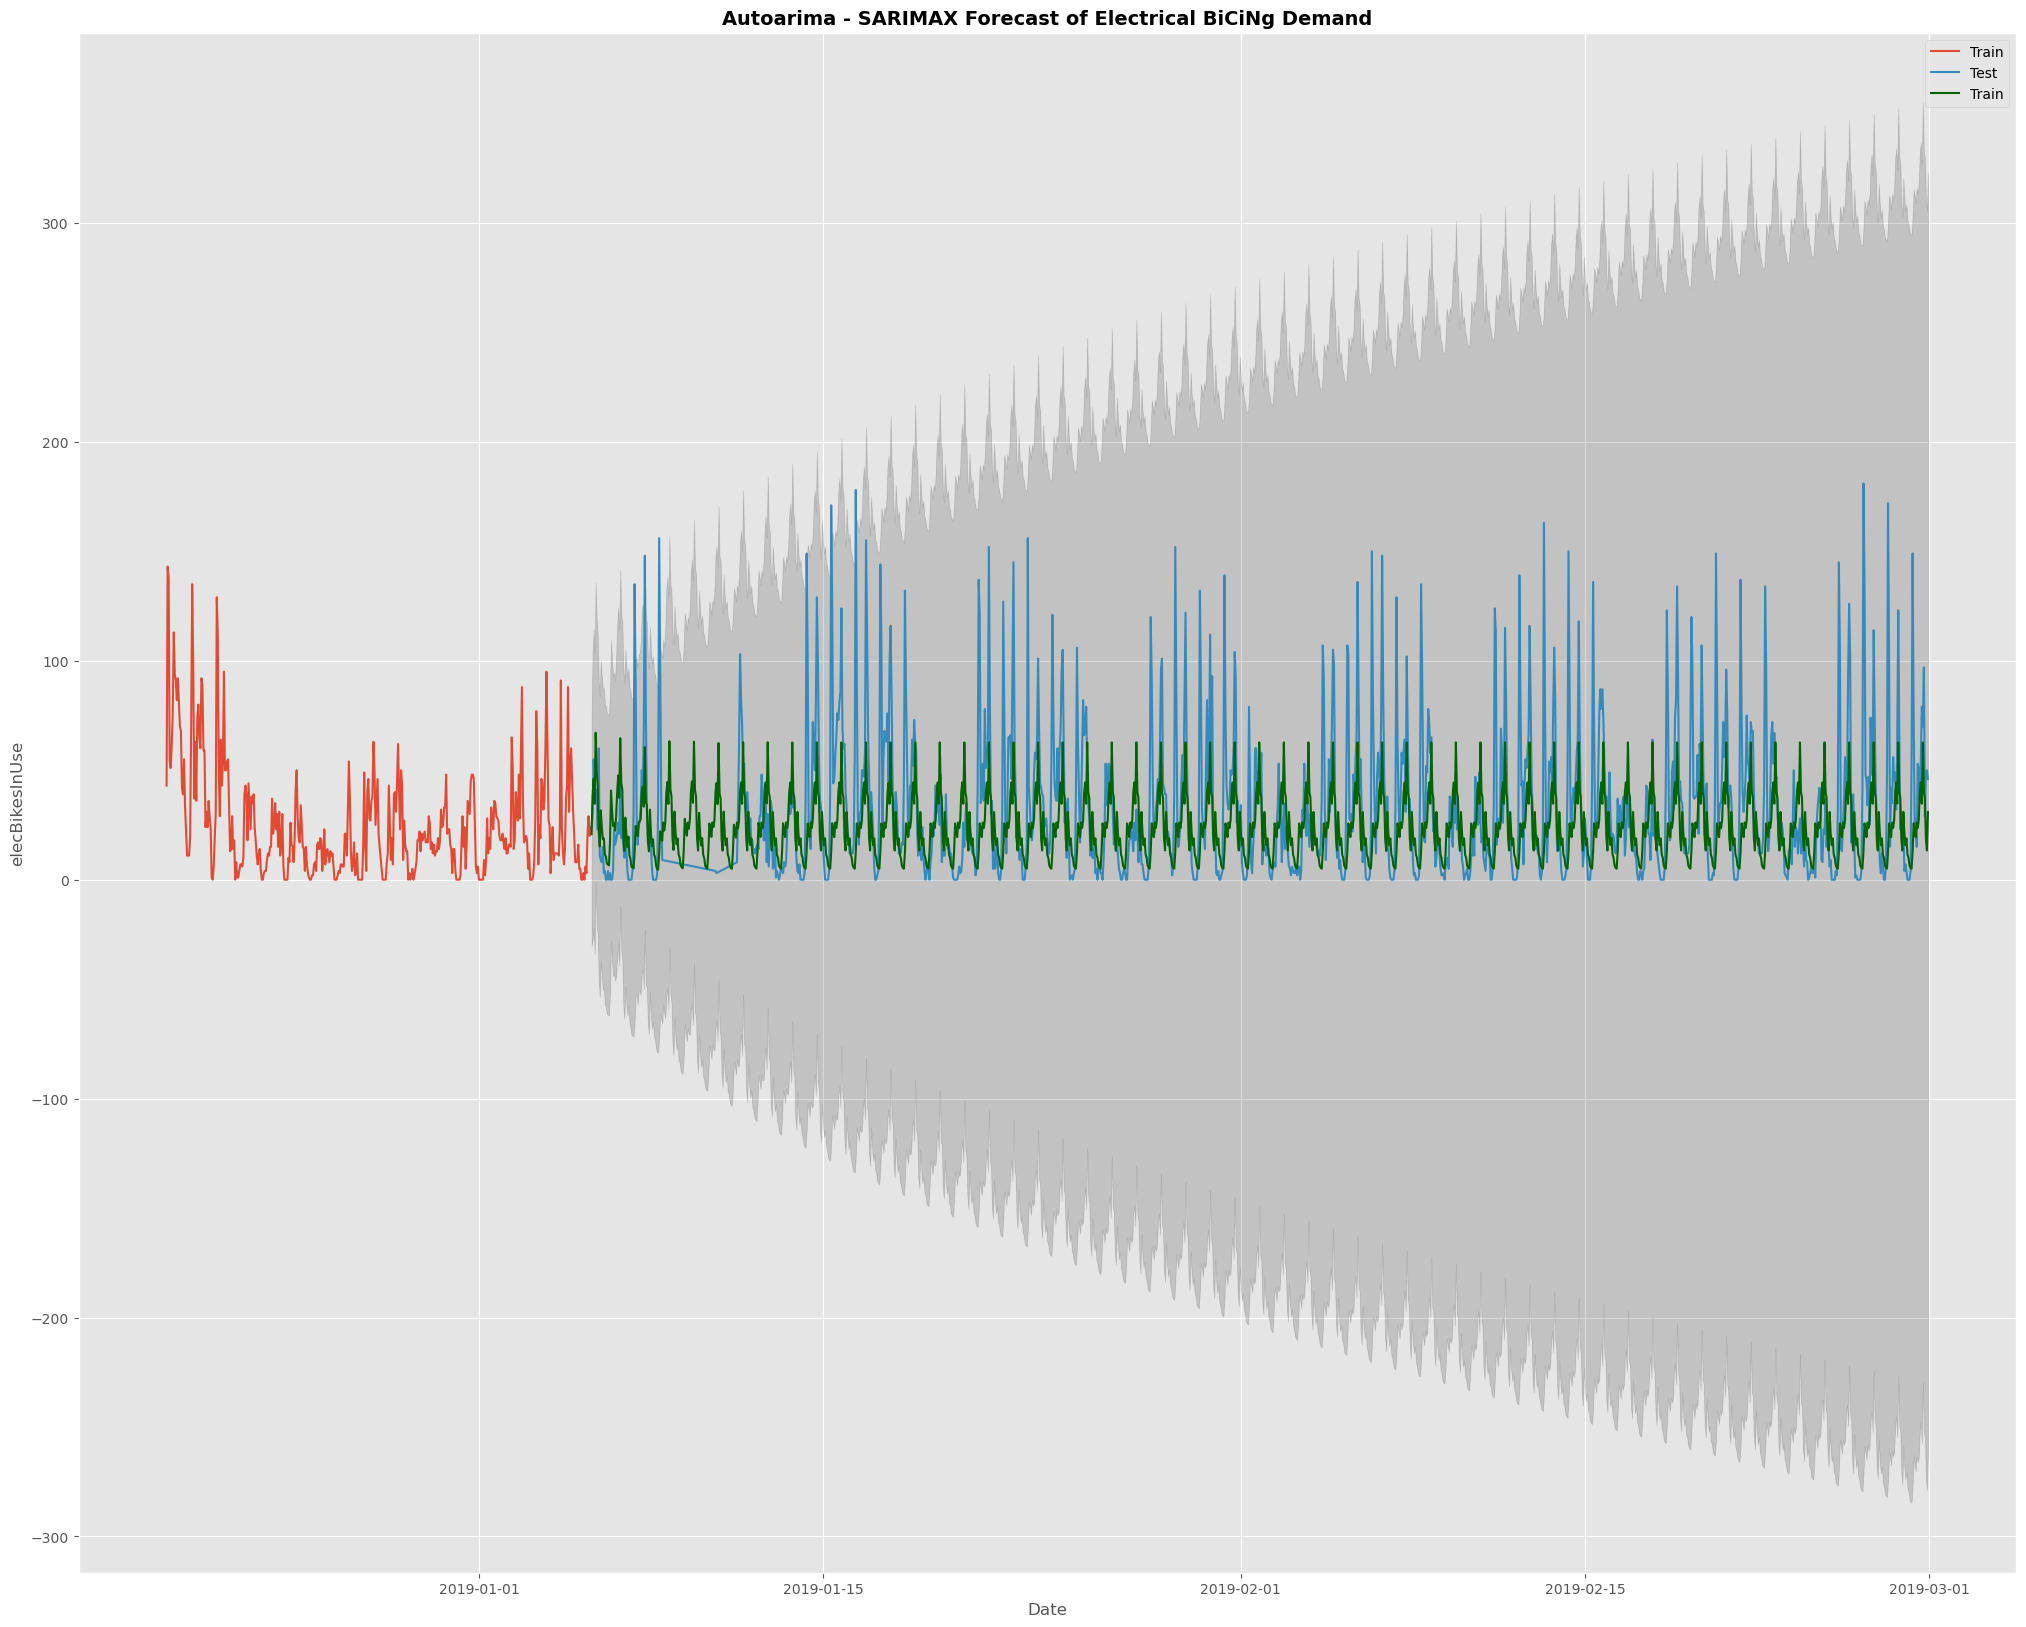

In [406]:
# Plot
plt.figure(figsize=(25,20))
fig = sns.lineplot(data = elecBikes_in_use_df.iloc[3000:len(y_elec_train)], x= "Date", y ="elecBikesInUse",label='Train')
fig = sns.lineplot(data = elecBikes_in_use_df[len(y_elec_train):], x= "Date", y ="elecBikesInUse",label='Test')
fig = sns.lineplot(data = elec_fitted_series,color='darkgreen', label='Train')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Autoarima - SARIMAX Forecast of Electrical BiCiNg Demand", fontsize=14,fontweight='bold')
plt.show()
fig.figure.savefig("SARIMAX short electric Bicing Demand.png", bbox_inches='tight')

In [290]:
elecBikes_Actual = y_elec_test.reset_index(drop=True)
elecBikes_Actual

0      28
1      35
2      18
3      29
4      17
       ..
849    97
850    29
851    49
852    50
853    46
Name: elecBikesInUse, Length: 854, dtype: int64

In [291]:
elecBikes_Forecast = elec_fitted_series.reset_index(drop=True)
elecBikes_Forecast

0       20.850444
1       38.311037
2       46.097605
3       34.692400
4       67.115790
          ...    
1301    40.075572
1302    37.435053
1303    18.768955
1304    13.336497
1305    30.929608
Name: Forecast, Length: 1306, dtype: float64

In [292]:
evaluate_elec_df = pd.concat([elecBikes_Actual,elecBikes_Forecast],axis=1)
evaluate_elec_df.dropna(inplace=True)
evaluate_elec_df

elecBikesInUse   Forecast
0              28.0  20.850444
1              35.0  38.311037
2              18.0  46.097605
3              29.0  34.692400
4              17.0  67.115790
..              ...        ...
849            97.0  30.929608
850            29.0  21.171784
851            49.0  15.737738
852            50.0  18.856040
853            46.0  11.442338

[854 rows x 2 columns]

In [293]:
mech_error = rmse(evaluate_elec_df['Forecast'],evaluate_elec_df['elecBikesInUse'])
mech_error

39.17946792211621

In [294]:
mech_mape = mape(evaluate_elec_df['elecBikesInUse'],evaluate_elec_df['Forecast'])
mech_mape

168.25568128404342

In [295]:
mech_mae = mean_absolute_error(evaluate_elec_df['elecBikesInUse'],evaluate_elec_df['Forecast'])
mech_mae

27.870833133255147